*Цель* данной работы - выявить закономерности и характерные особенности "успешных" игр, чтобы в дальнейшем провести прибыльную/успешную рекламную компанию новинок игровой индустрии.

Для этого необходимо выполнить следующие задачи:
 - Провести предобработку данных из открытых источников;
 - Выделить актуальный временной период, по которому можно будет предсказать дальнейшие тенденции игростроения и провести в этих рамках исследовательский анализ данных;
 - Провести статистический анализ данных, чтобы подтвердить гипотезы о различных жанрах или платформах.

# **Чек-лист**
- [x]  Шаг 1. Откройте файл с данными и изучите общую информацию
(Путь к файлу: /datasets/games.csv).
- [x]  Шаг 2. Подготовьте данные
 - [x] Замените названия столбцов (приведите к нижнему регистру);
 - [x] Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
 - [x] Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - [x] Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
 - [x] Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
- [x]  Шаг 3. Проведите исследовательский анализ данных
 - [x]  Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - [x]  Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - [x]  Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
 - [x]  Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - [x]  Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - [x]  Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.Соотнесите выводы с продажами игр на других платформах.
 - [x]  Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- [x]  Шаг 4. Составьте портрет пользователя каждого региона
 - Определите для пользователя каждого региона (NA, EU, JP):
   - [x] Самые популярные платформы (топ-5). Опишите различия в долях продаж.
   - [x]  Самые популярные жанры (топ-5). Поясните разницу.
   - [x] Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- [x]  Шаг 5. Проверьте гипотезы
 - [x]  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - [x]  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
- [x]  Шаг 6. Напишите общий вывод

# **Начало работы с данными**

Импорт необходимых для исследования библиотек:

In [1]:
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import pandas as pd
import matplotlib

Надстройка для более качественного отображения графиков:

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'font.size': 18})

Передаём данные из документа в переменную **games**, выводим первые 5 строк:

In [3]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общая информация о датафрейме:

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


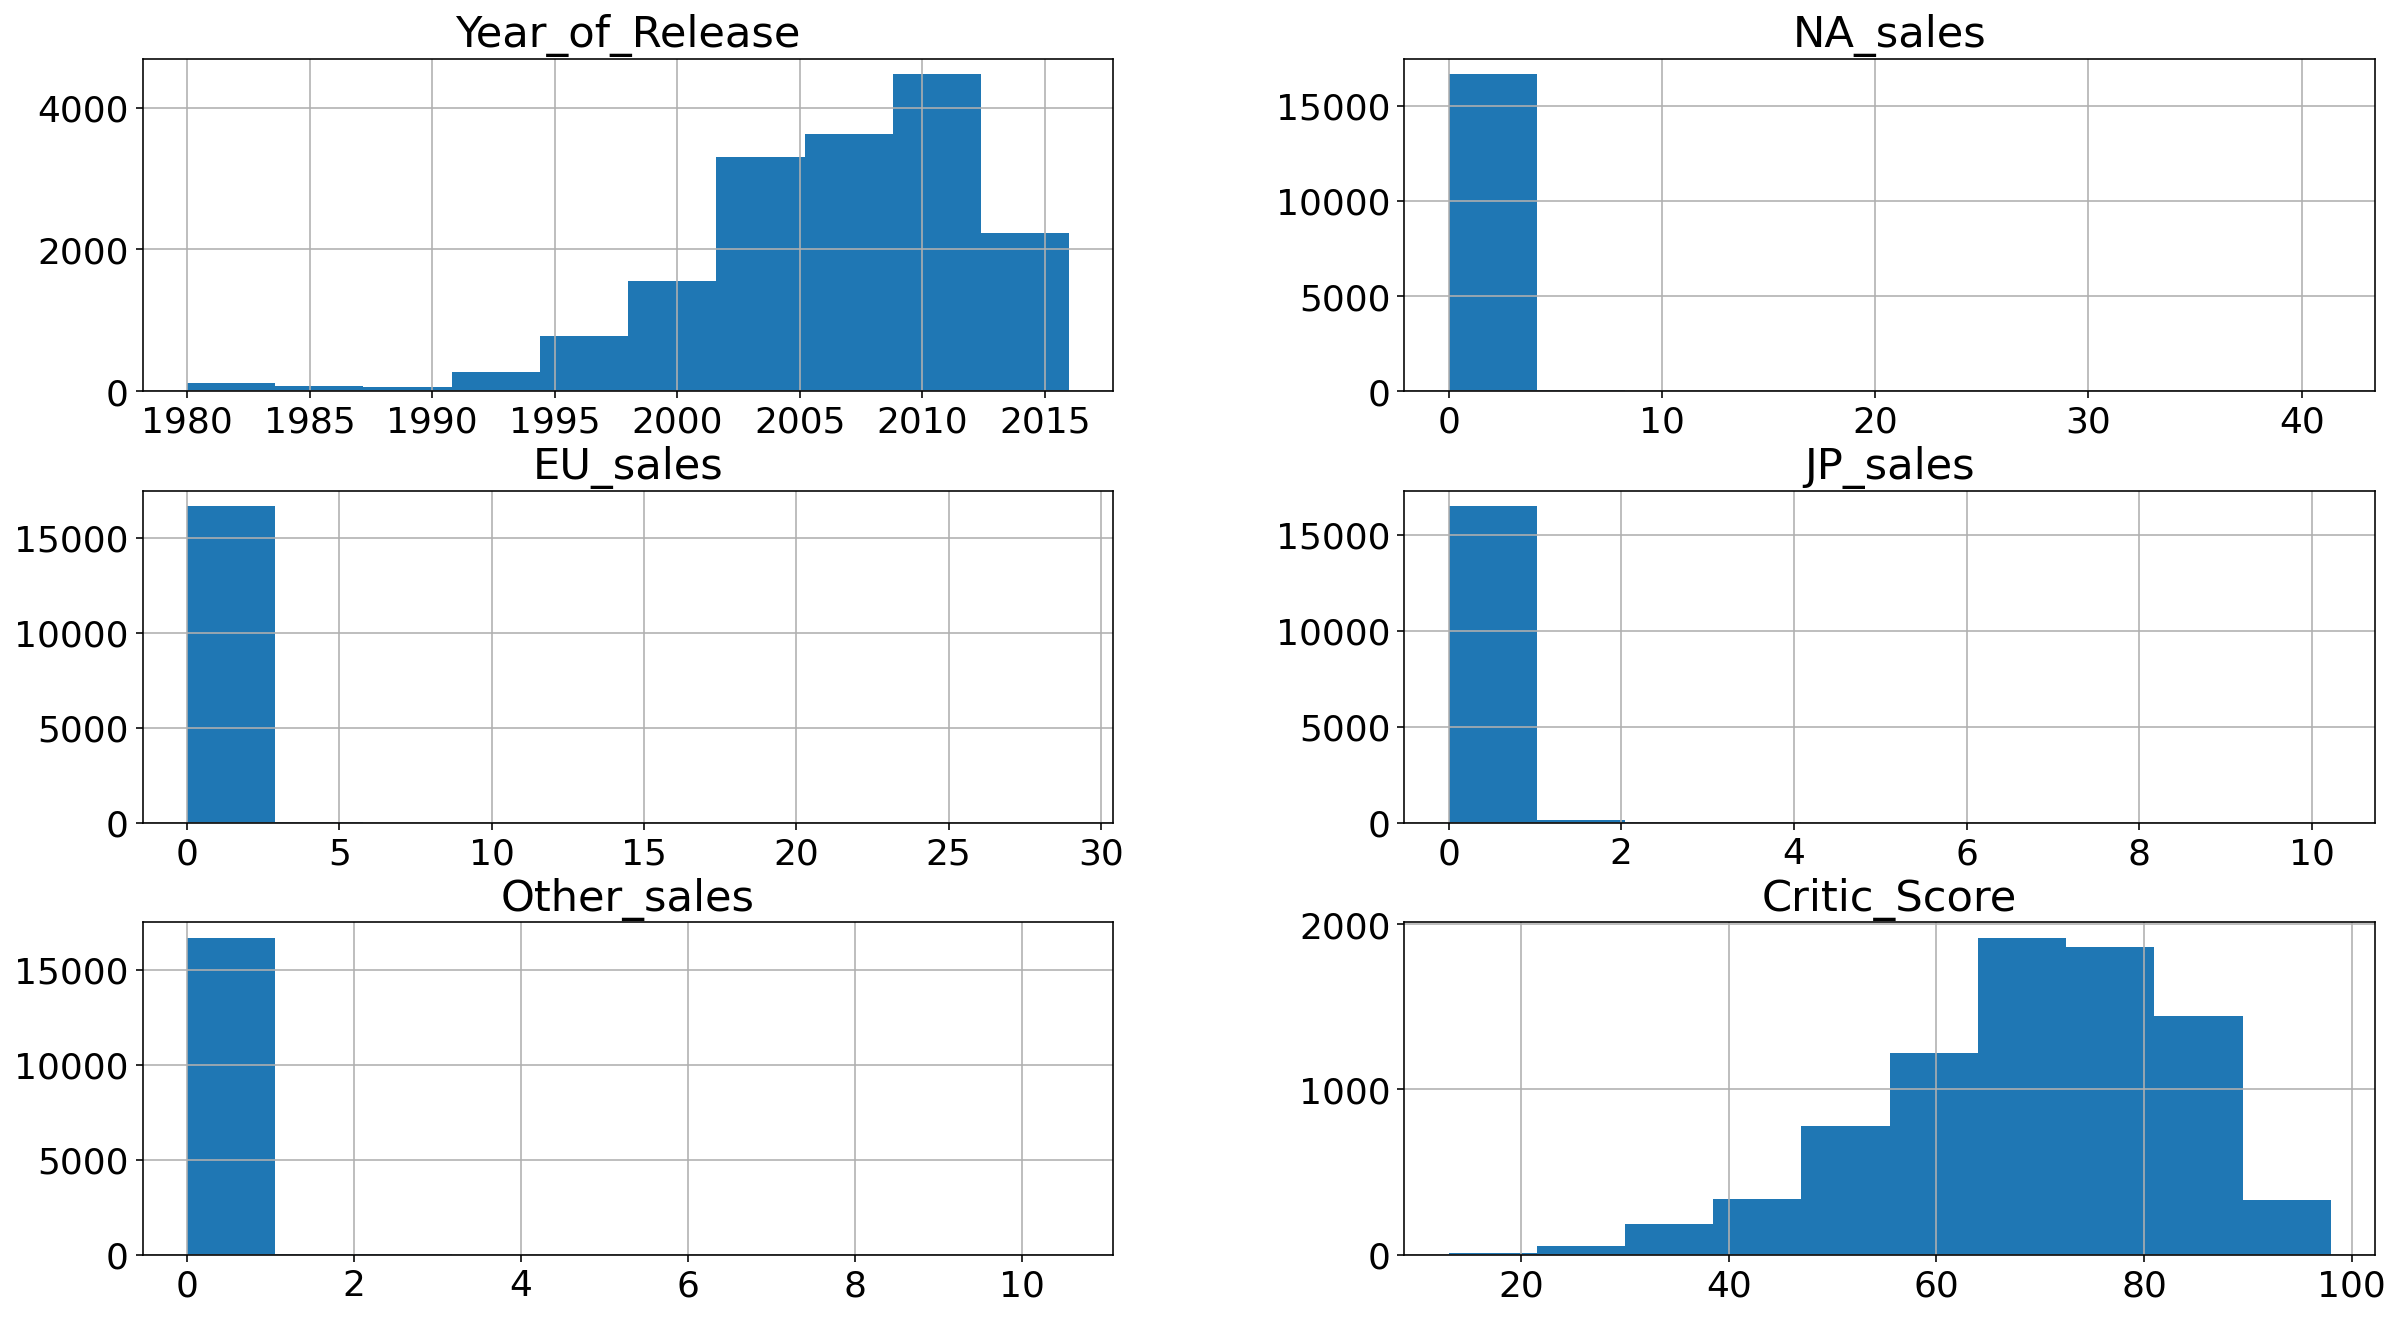

In [5]:
games.hist(figsize=(20,11))
plt.show()

Статистическое описание данных:

In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# **Предобработка данных**

Приведём названия колонок датафрейма к нижнему регистру:

In [7]:
games.columns = games.columns.str.lower()

## **Обработка пропусков**

Рассчитаем долю пропущеных в датафрейме данных:

In [8]:
games.isna().mean().sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

Доля пропусков в столбцах **'name'** и **'genre'** столь мала, что эти данные можно исключить из расчёта.

In [9]:
games = games.dropna(subset=['name']).reset_index(drop=True)

Заполнять остальные пропуски в остальных столбцах считаю нецелесообразным, поскольку зависимости между данными либо не существует, как в случае с годом выпуска, либо они зависят сразу от нескольких параметров, взаимосвязь между которыми пока установить невозможно. Поскольку большая часть пропусков находится в колонках, отвечающих за оценку игры людьми, можно предположить, что пропуски, помимо человеческого фактора или появления ошибок при переносе данных, обусловлены сложностью или неоднозначностью выставления оценки той или иной игре, либо популярность игры крайне низка и на неё не хватает отзывов.

In [10]:
games['rating'].fillna(value='RP', inplace=True)
games.rating.value_counts()

RP      6767
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

## **Приведение данных к нужному типу**

Из анализа данных в таблицы. очевидно, что к целочисленному типу можно привести столбцы **'critic_score'** и **'year_of_release'** (поскольку в данном столбце указан только год, то преобразовывать его в datetime тип считаю необязательным).

In [11]:
games = games.astype({'critic_score': 'Int64','year_of_release':'Int64'}, errors='ignore')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,RP


В колонке **'user_score'** помимо NaN и числовых значений имеется также строка 'tbd', из-за чего данная колонка имеет тип object, что создаёт некоторые неудобства для дальнейшей работы. 'tbd' можно расшифровать как To Be Decided или To Be Determined, то есть ещё не определён, что позволяет в нашем случае интерпретировать его как NaN, а затем перевести всю колонку в тип float.

In [12]:
games['user_score'].replace('tbd', float('NaN'), inplace=True)
games['user_score'] = pd.to_numeric(games['user_score'])

## **Обработка дубликатов**

Проверка на полные дубликаты в датафрейме:

In [13]:
games.duplicated().sum()

0

In [14]:
games['rating'].replace({'EC': 'E', 'K-A': 'E', 'M': 'AO/M', 'AO': 'AO/M'}, inplace=True)
games['rating'].value_counts()

RP      6767
E       4001
T       2961
AO/M    1564
E10+    1420
Name: rating, dtype: int64

## **Добавление новых столбцов**

Суммарные продажи во всех регионах:

In [15]:
games['total_sales'] = games.loc[:, 'na_sales':'other_sales'].sum(axis=1)
games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16708     0.01
16709     0.01
16710     0.01
16711     0.01
16712     0.01
Name: total_sales, Length: 16713, dtype: float64

**Вывод**:
В исходном датафрейме проведены следующие преобразования:
- Названия колонок датафрейма приведены к нижнему регистру;
- Убраны строки с большим количеством пропусков в данных;
- Данные в столбцах **'critic_score'** и **'year_of_release'** приведены к целочисленному типу;
- Обработано значение 'tbd' в столбце **'user_score'**, проищведены необходимые замены;
- Добавлена новая колонка с суммарными продажами игры по всем регионам;
- Произведена проверка на полные дубликаты(отсутствуют).

# **Исследовательский анализ данных**

## Распределение игр по годам

<AxesSubplot:xlabel='year_of_release', ylabel='Count'>

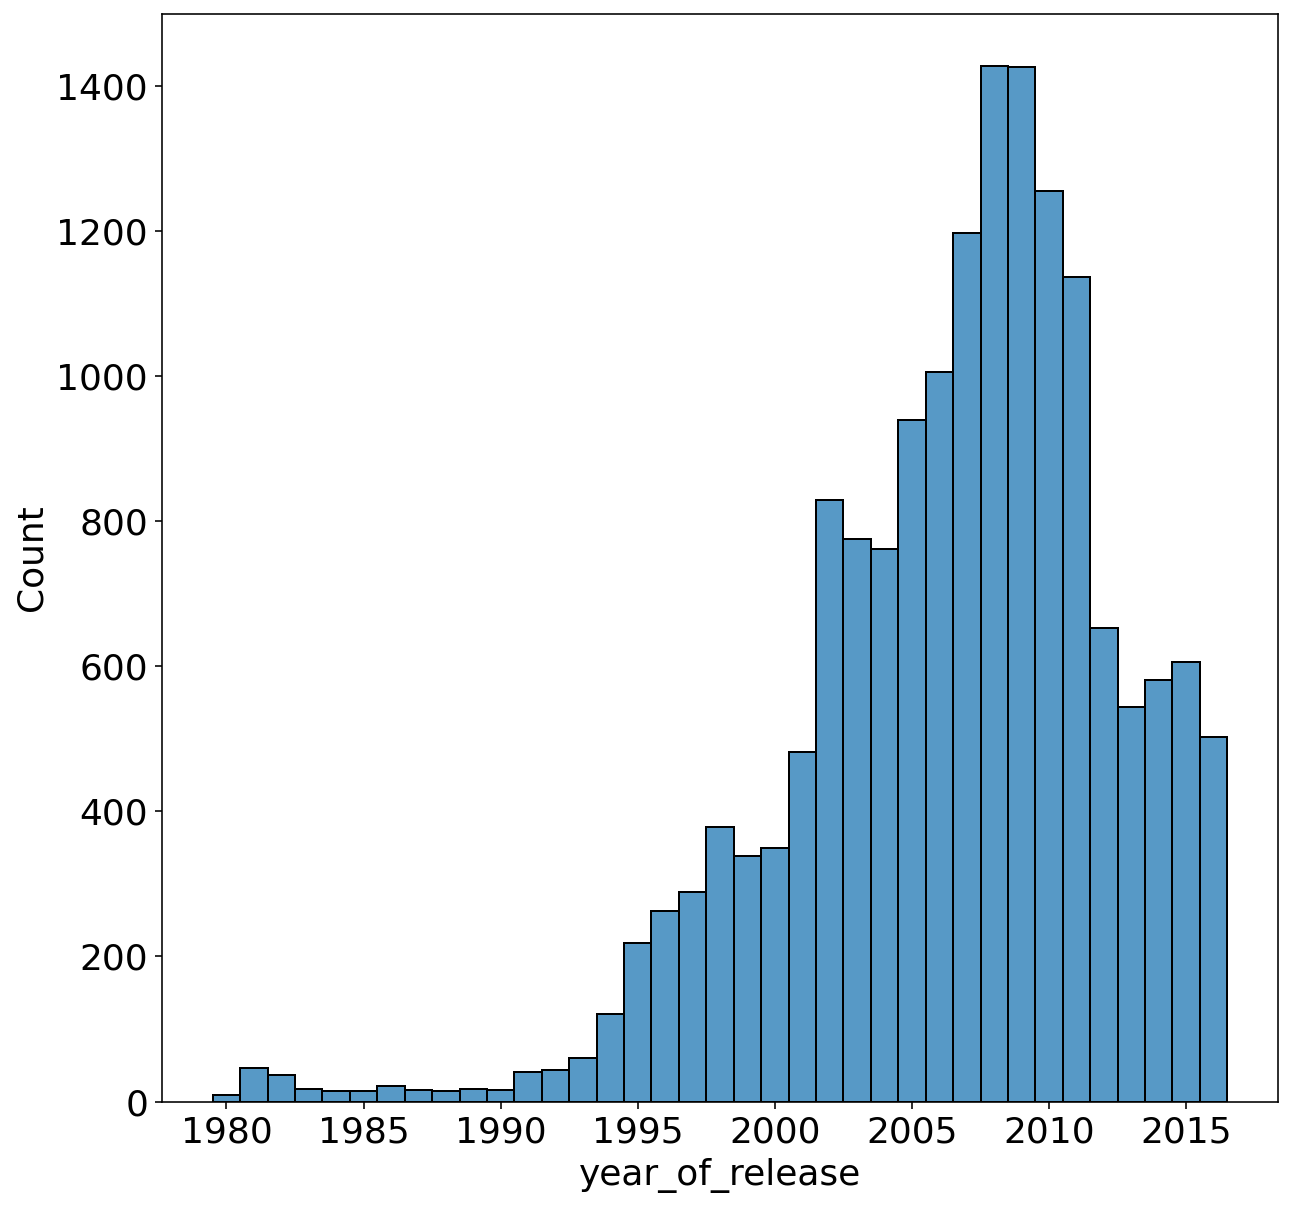

In [16]:
year_stat = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(10, 10))
sns.histplot(data=games['year_of_release'], discrete=True)

**Вывод**: до 1994 года выпускалось довольно небольшое количество игр(< 200), просле чего скачки производства наблюдались в 2002, 2008,2009 годах, после чего производство игр пошло на спад. Более симметричное распределение можно рассматривать, если брать данные, начиная с 2000 года.

## Динамика продаж по годам

Найдём платформы, наиболее популярные по продажам в период с 1994 по 2016 годы и построим их распределение по годам, чтобы вычислить, сколько длится жизненный цикл для одной платформы:

In [17]:
platform_stat = games.groupby(['platform'])['total_sales'].agg('sum').sort_values(ascending=False)
platform_stat.head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

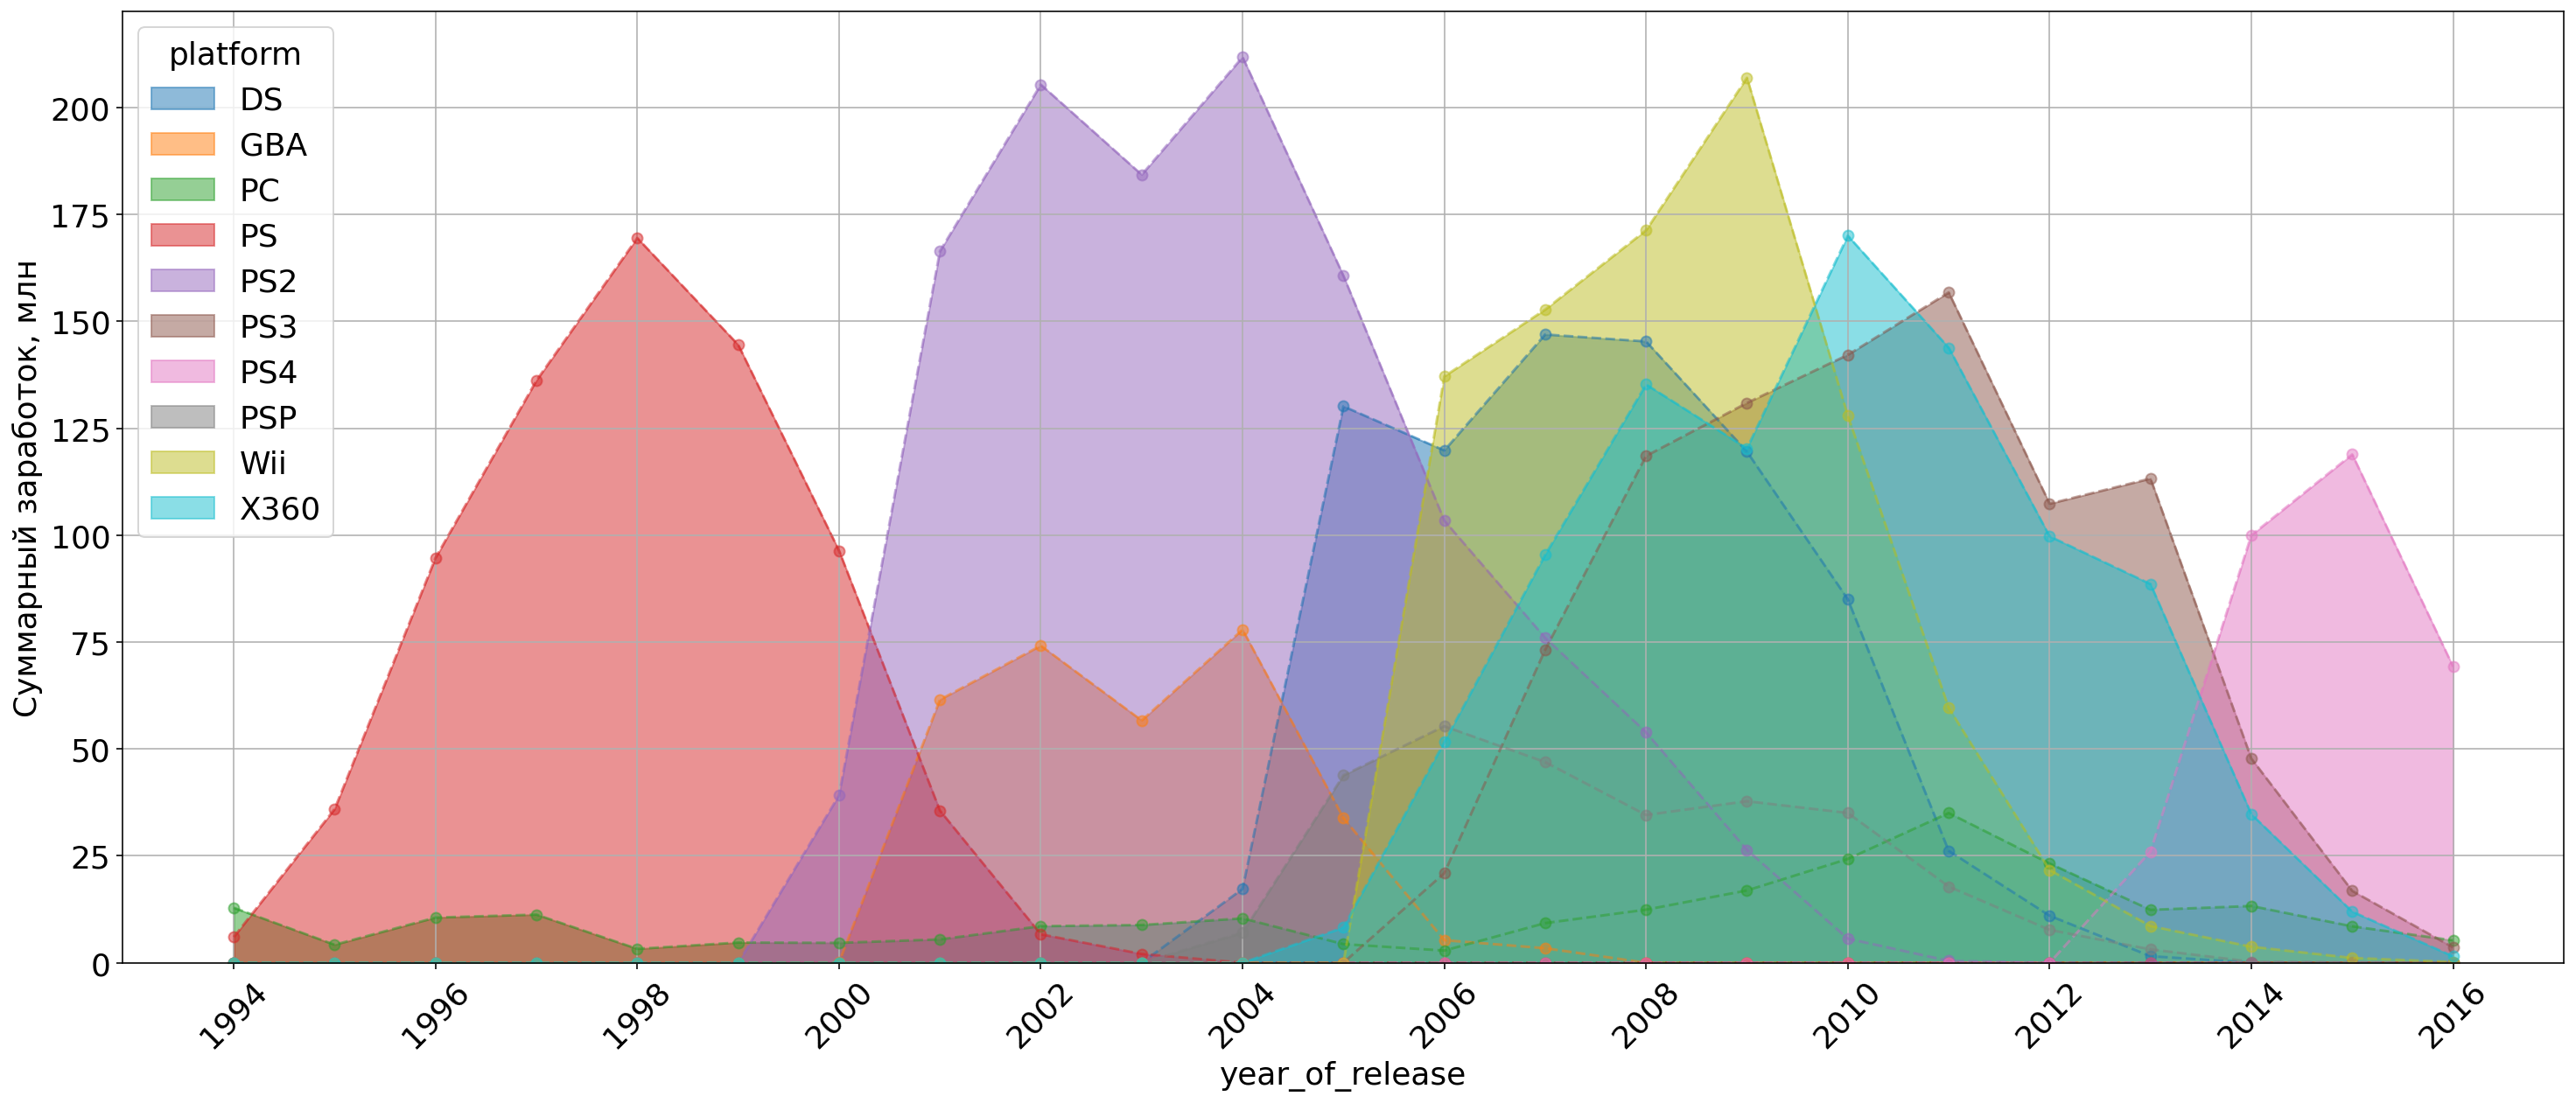

In [18]:
condition = (games['platform'].isin(platform_stat.head(10).index.to_list())) & (games['year_of_release'] >= 1994)
platform_stat_year = games[condition].pivot_table(
    index='year_of_release', columns='platform',values='total_sales', aggfunc='sum'
)
platform_stat_year.plot(kind='area', rot=45, figsize=(25,10), stacked=False, grid=True,
                        style='--o',xticks=range(1994,2017,2), ylabel='Суммарный заработок, млн')
plt.show()

**Вывод**: из графика можно определить, что платформы от взлёта до падения обычно проживают от 8 до 12 лет, исходя из чего её средний цикл жизни составляет порядка 10 лет.

## Анализ данных за актуальный период

Этот срок будет определяющим для дальнейшего исследования, поскольку для многих случаях характерно, что сроки роста продаж платформы сопоставимы со сроками их падения. На этом основании, для предсказания дальнейших характеристик за 2017 года будем использовать данные не позднее 2014 года.

In [19]:
actual_games = games.loc[games.year_of_release >= 2014]

По этим данным как и раньше оценим динамику суммарных продаж уже актуальных платформ:

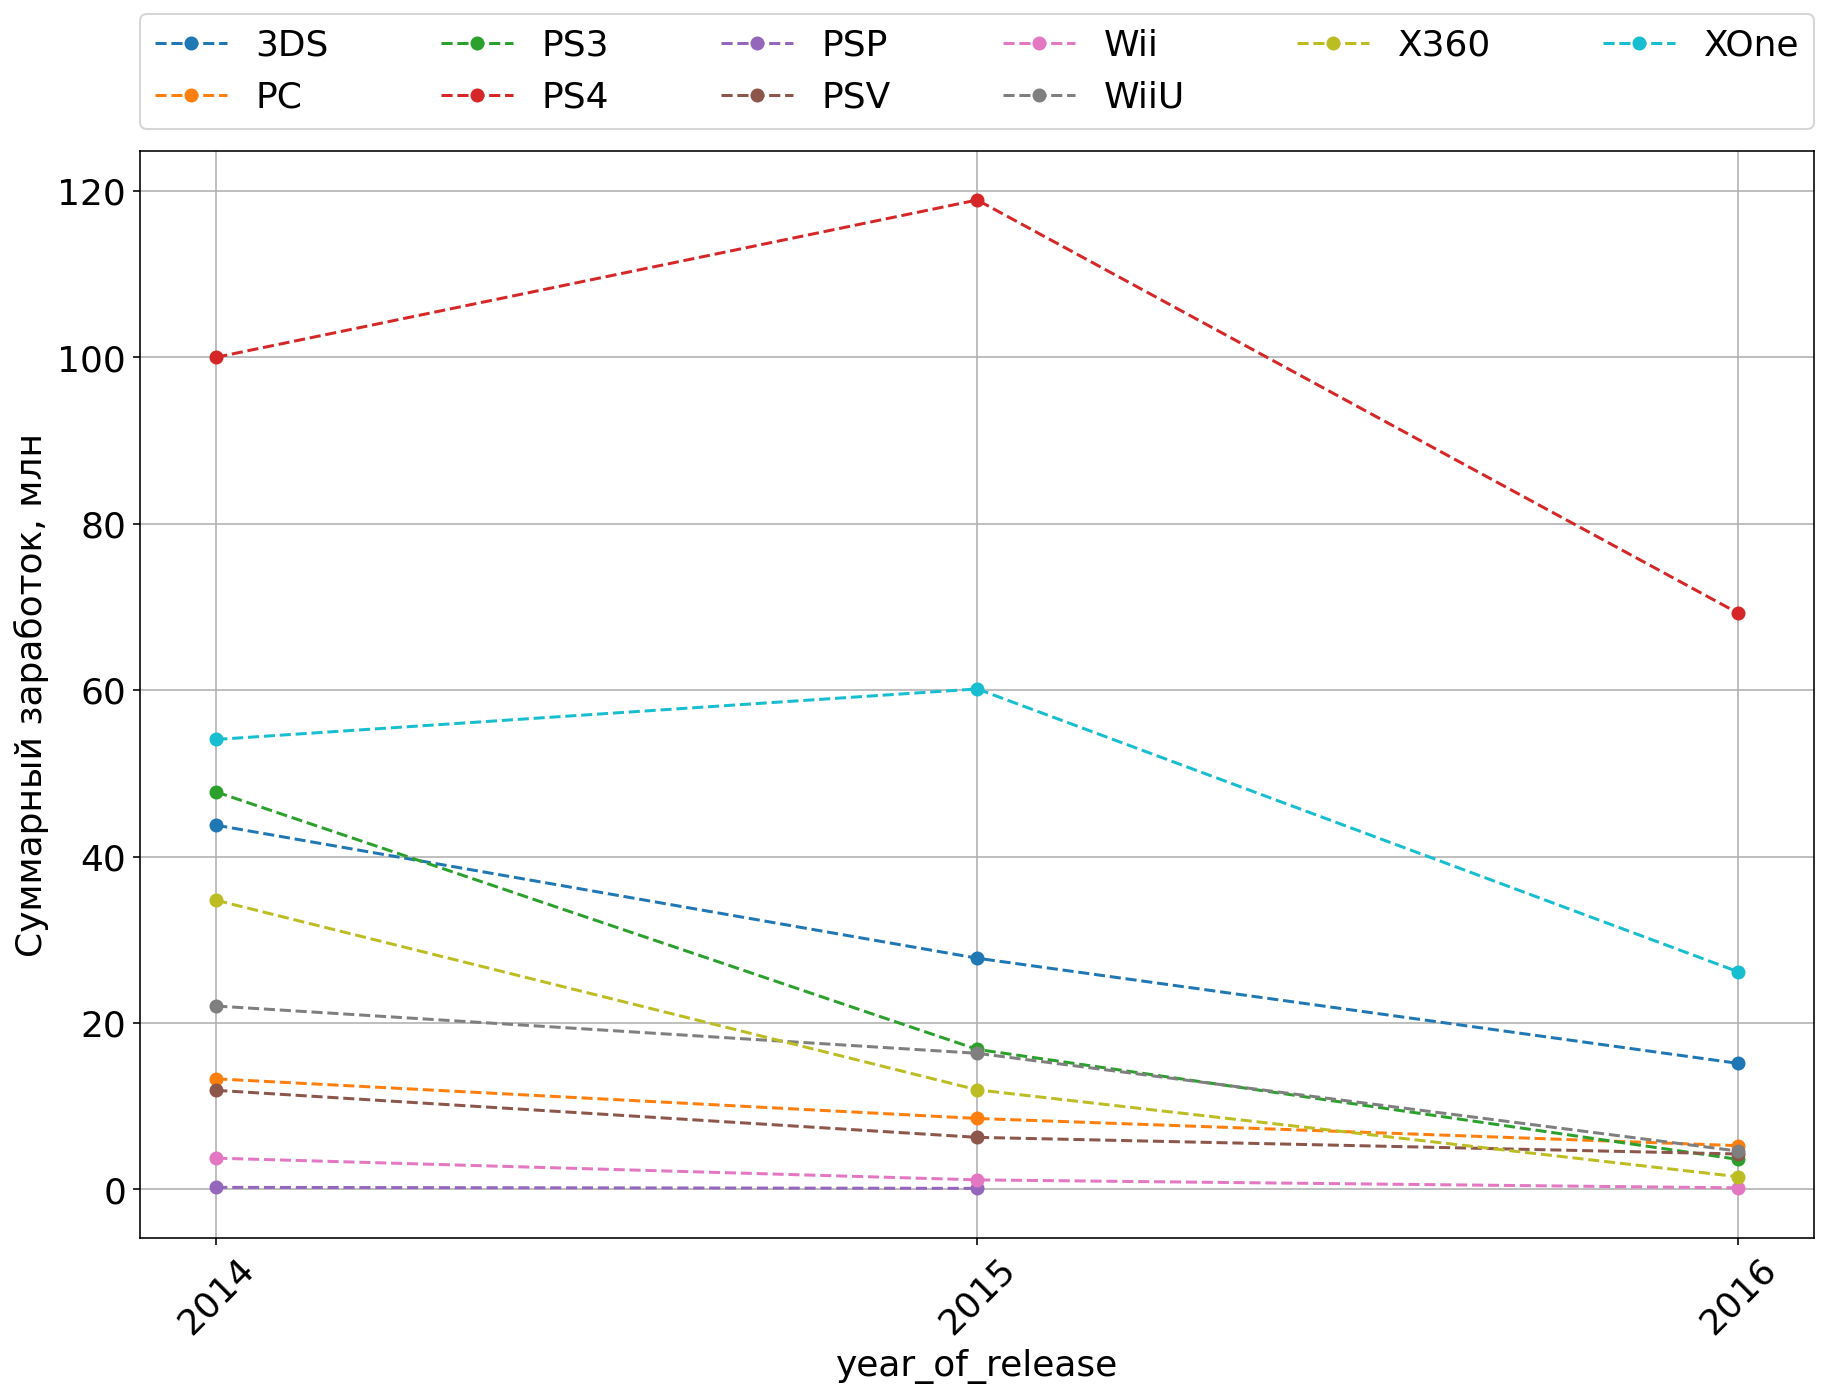

In [20]:
actual_platform_stat_year = actual_games.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
actual_platform_stat_year.plot(
    rot=45, figsize=(15,10),
    grid=True,
    stacked=False,
    style='--o',
    xticks=range(2014,2017), 
    ylabel='Суммарный заработок, млн'
)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=6, mode="expand", borderaxespad=0.)
plt.show()

In [21]:
actual_games[actual_games['year_of_release']==2016].pivot_table(
    index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'
).sort_values(by=2016, ascending=False)

year_of_release,2016
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


Согласно этому графику на 2016 год суммарные продажи каждой из компаний плавно падают, однако до 2015 года продажи PS4 и Xbox One росли, также они являются ведущими по продажам платформами на 2016, после которых следуют 3DS, PC и WiiU. 

## Анализ прибыльных платформ

Теперь выделим топ 5 платформ за актуальный период выпуска игр и посмотрим, как распределены их показатели продаж. 

In [22]:
top_5_actual_platform = actual_games.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).head()
top_5_actual_platform

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: total_sales, dtype: float64

Наблюдаются различия с показателями за 2016 год, а именно отсутствие PC в общем списке и наличие в нём Wii вместо WiiU, что объяснимо тем, что первый вариант существует дольше, чем 2.

Оценка статистических диапазонов по плаформам(куда входит большая часть продаж):

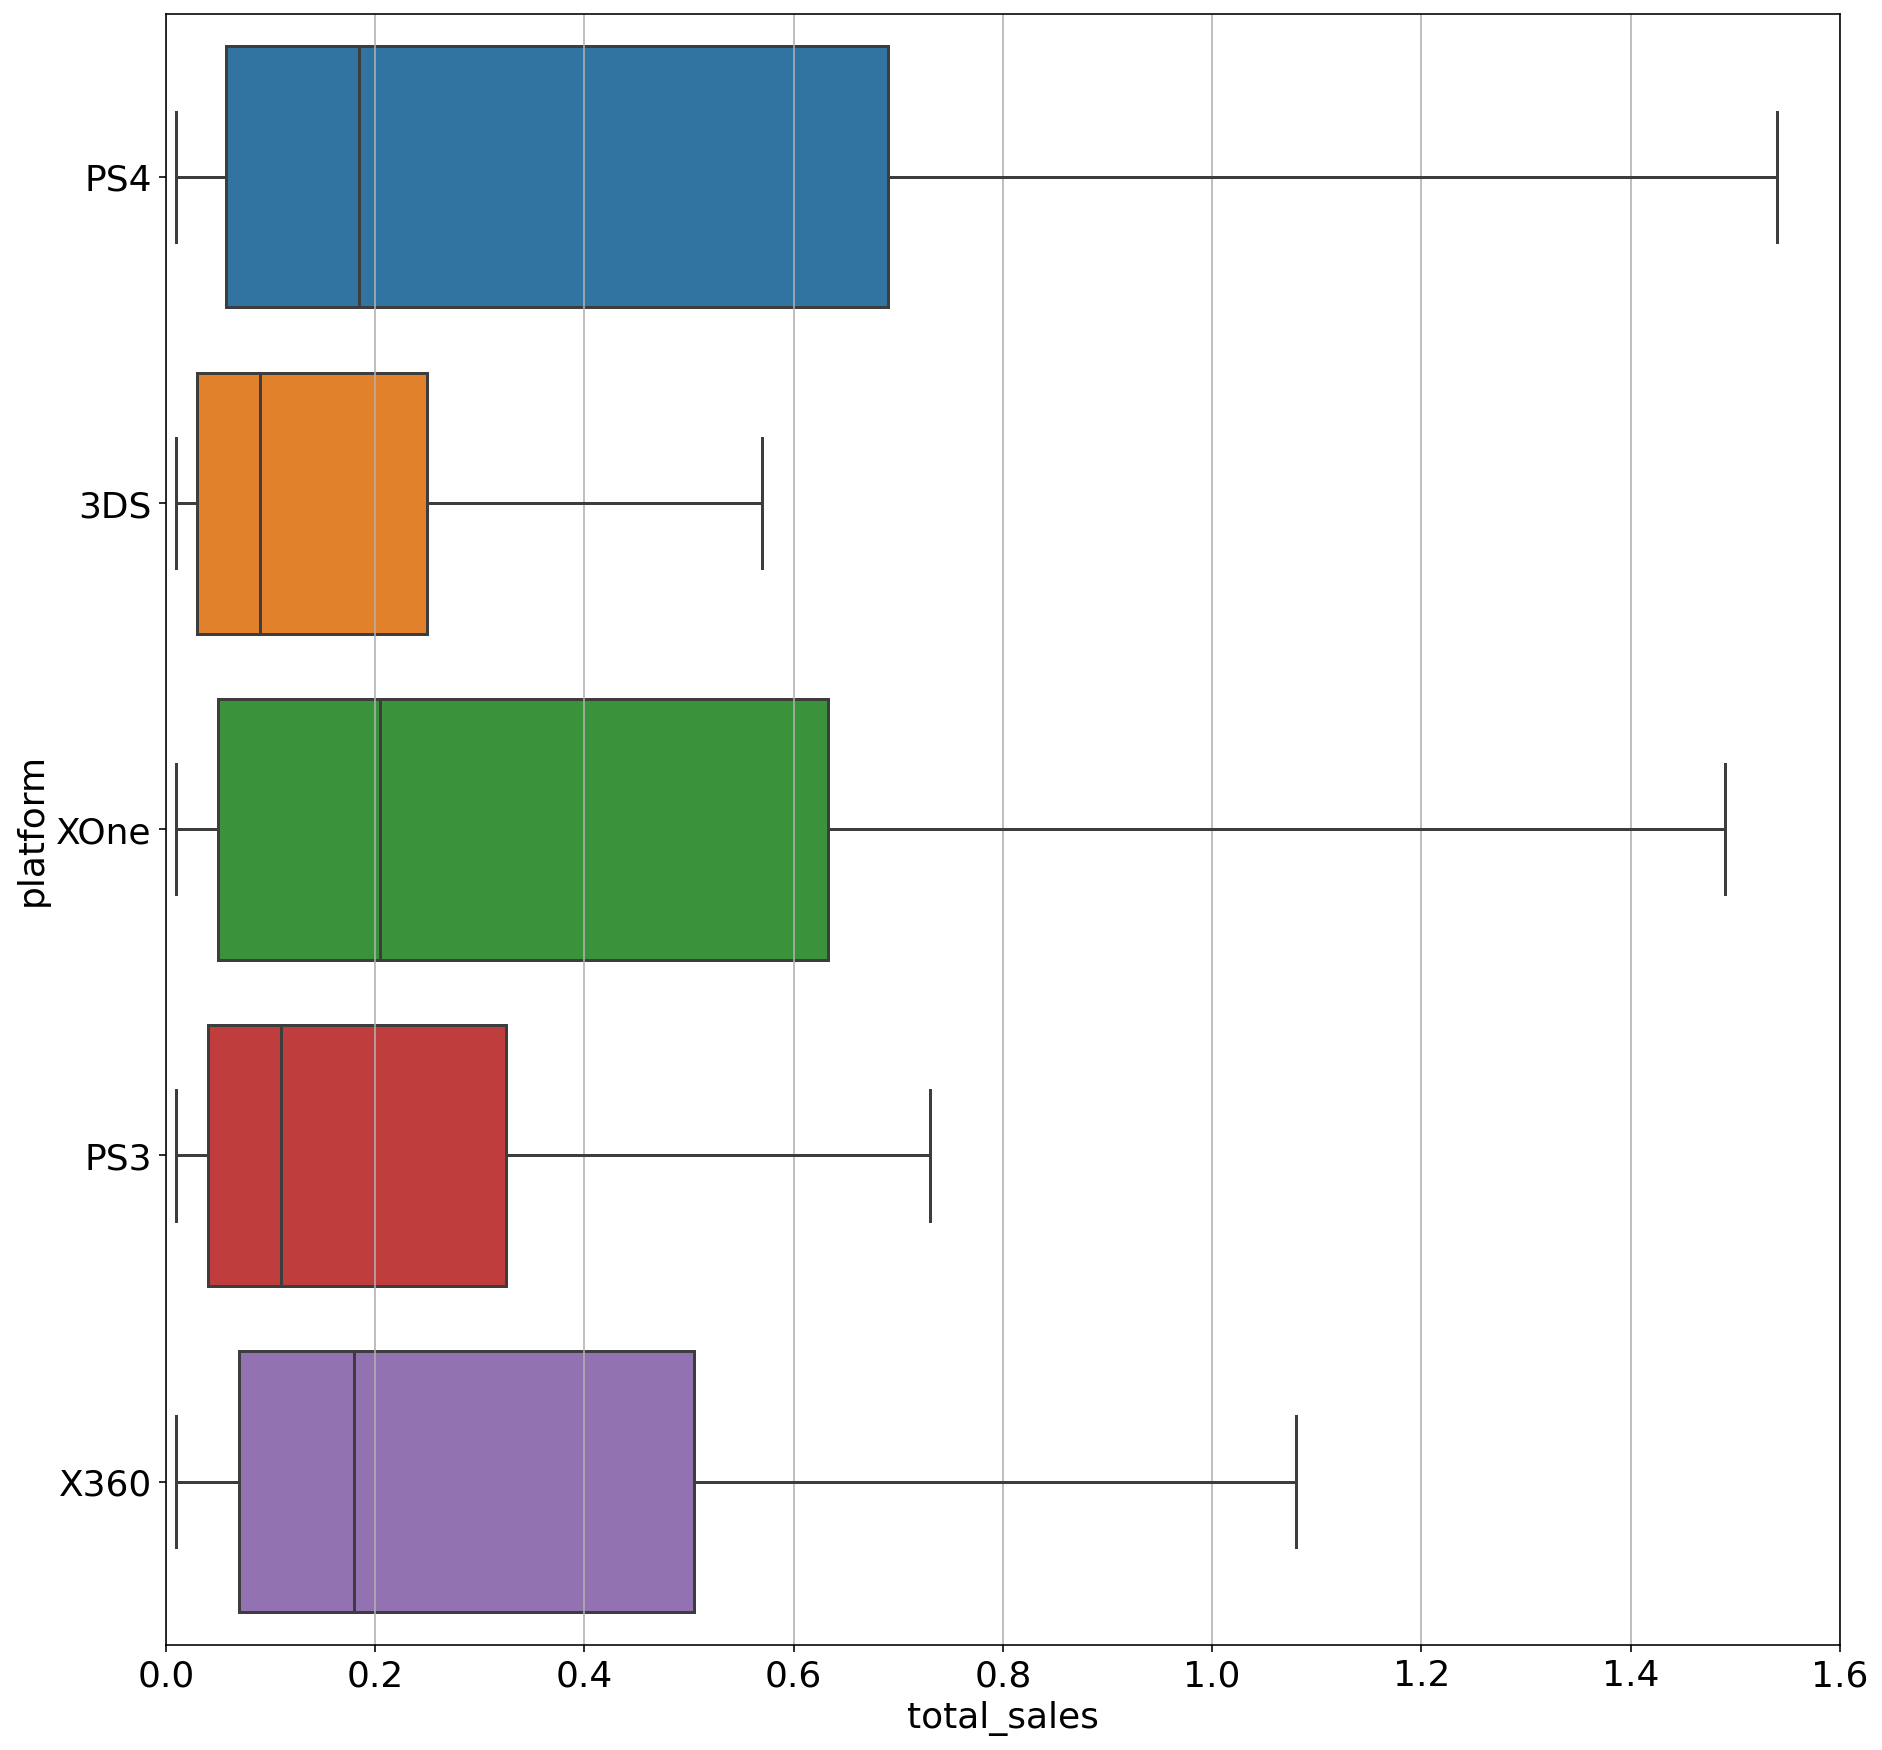

In [23]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(
    data=actual_games[actual_games.platform.isin(top_5_actual_platform.index)], x='total_sales', y='platform',
    showfliers=False
)
ax.set_xlim(0,1.6)
ax.xaxis.grid()

Оценка влияния игр, выходящих за пределы статистического диапазона на общее число продаж по платформе:

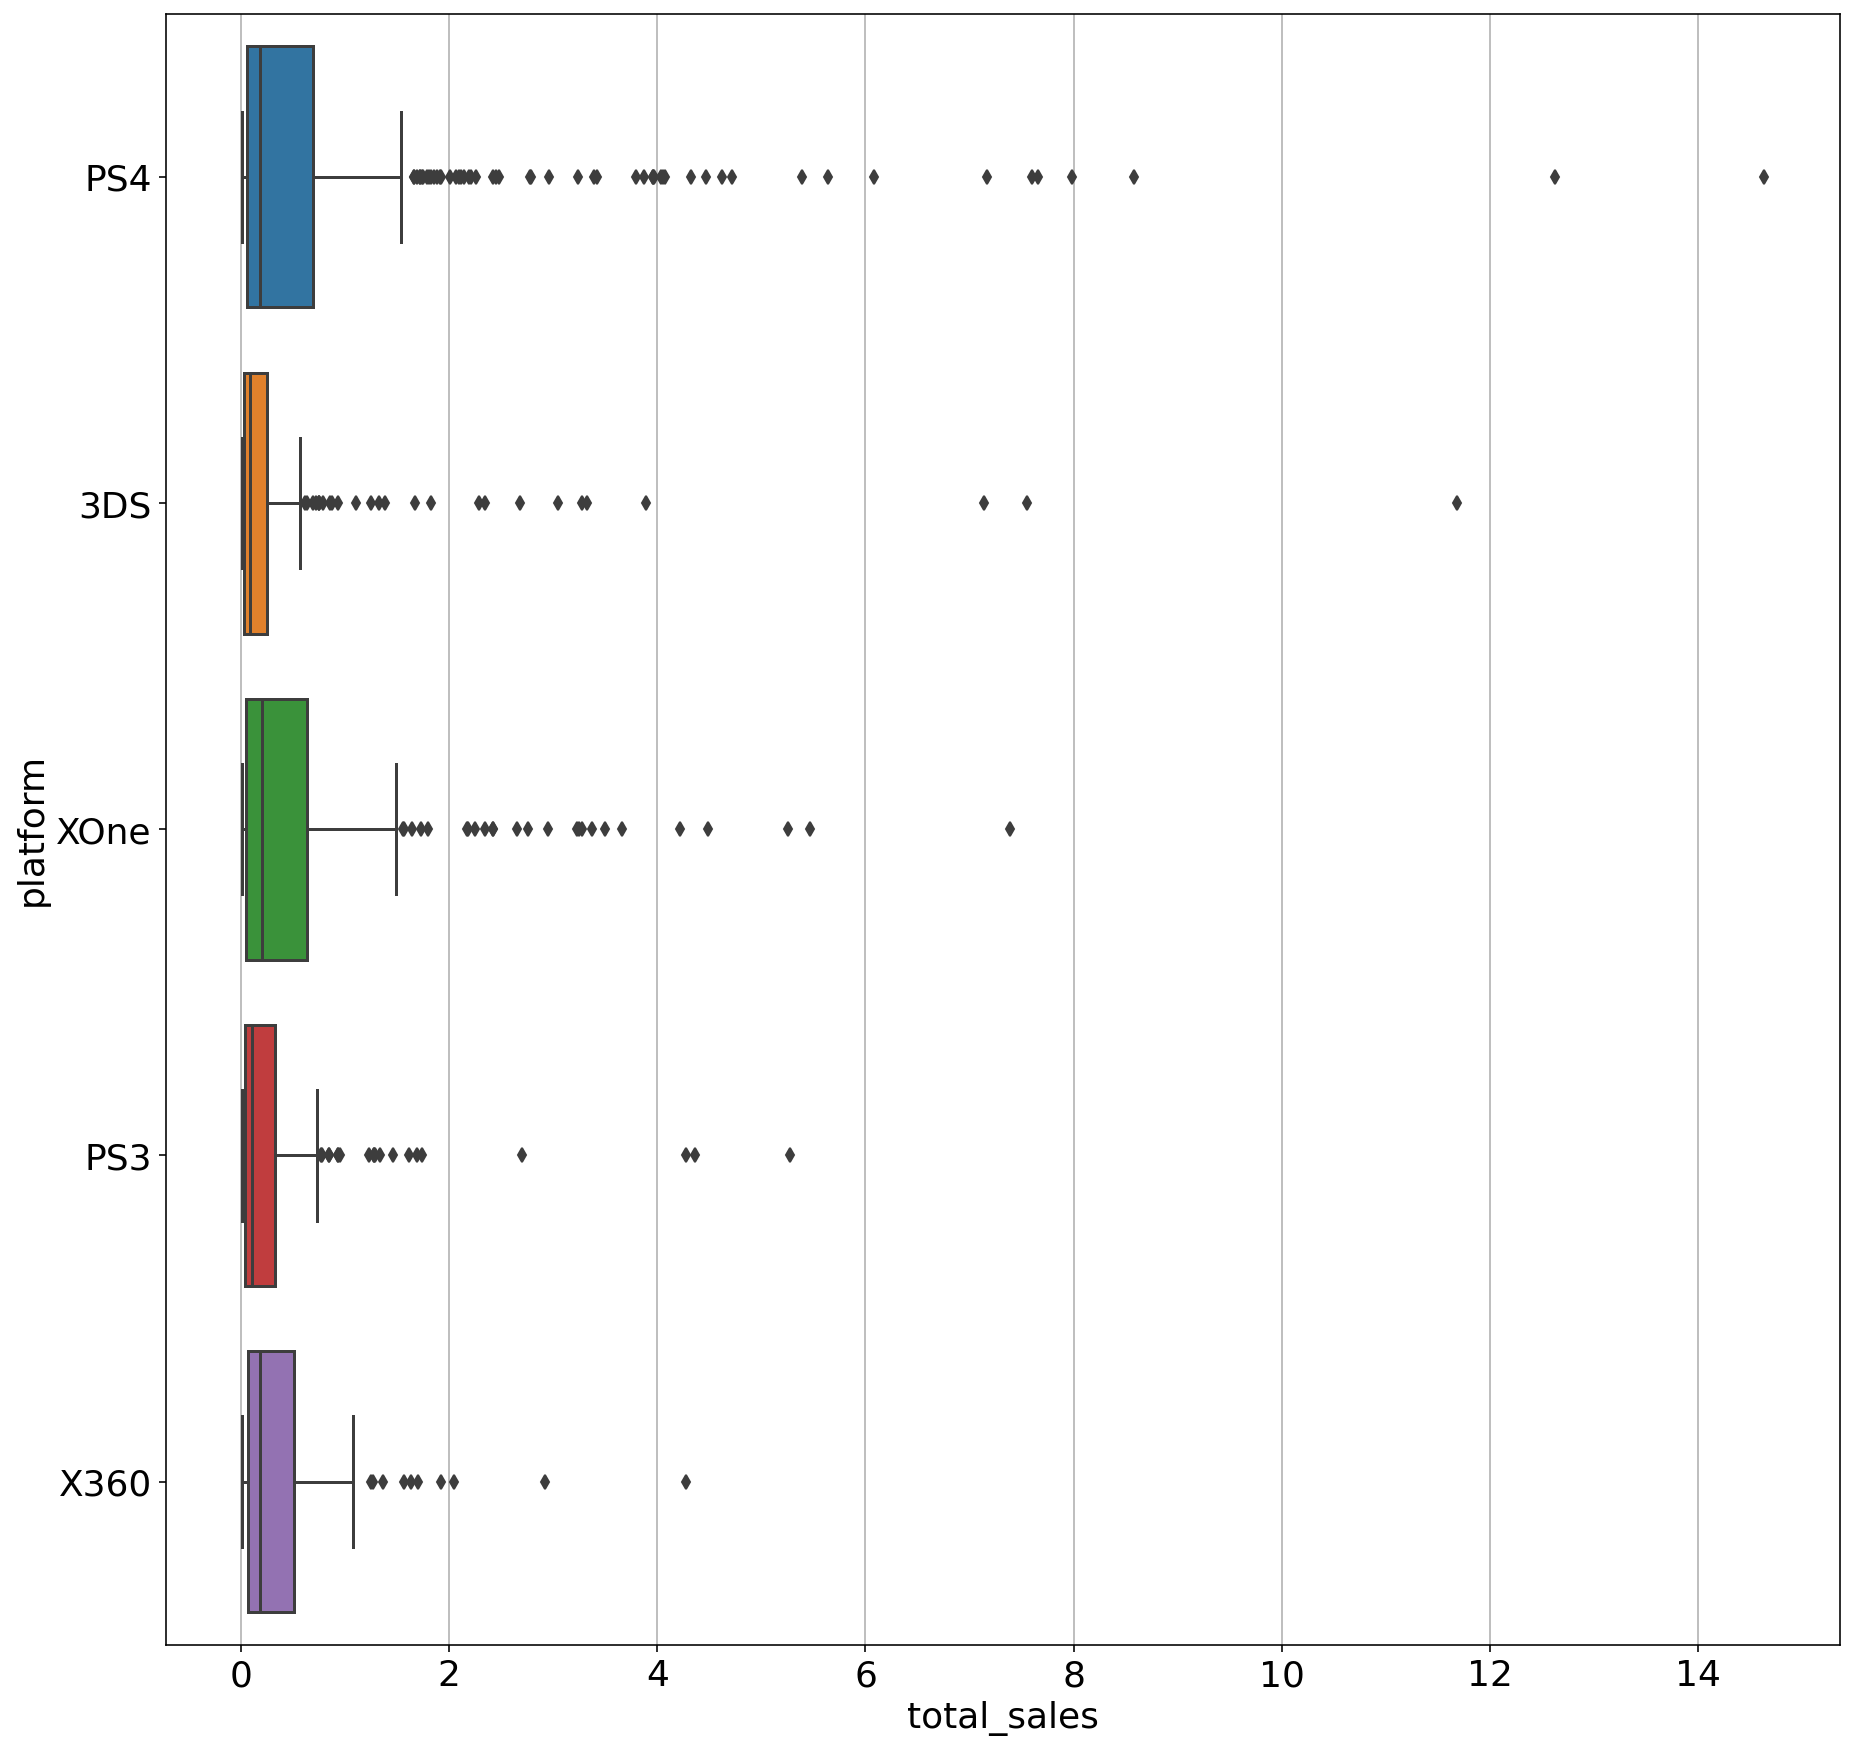

In [24]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(
    data=actual_games[actual_games.platform.isin(top_5_actual_platform.index)], x='total_sales', y='platform',
)
ax.xaxis.grid()

**Вывод**: Распределение на всех графиках смещено вправо(положительное), что свидетельствует о наличии весомого количества дорогостоящих продаж. При этом также достаточно большое количество точек он интерпретирует как выбросы. 

## Влияние отзывов на продажи среди популярных платформ

Рассмотрим одного из представителей этого списка, например PS4 и то как отзывы кореллируют с продажами этого девайса:

In [25]:
PS4_review = actual_games.loc[actual_games['platform'] == 'PS4', 'critic_score':'total_sales']
PS4_review.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


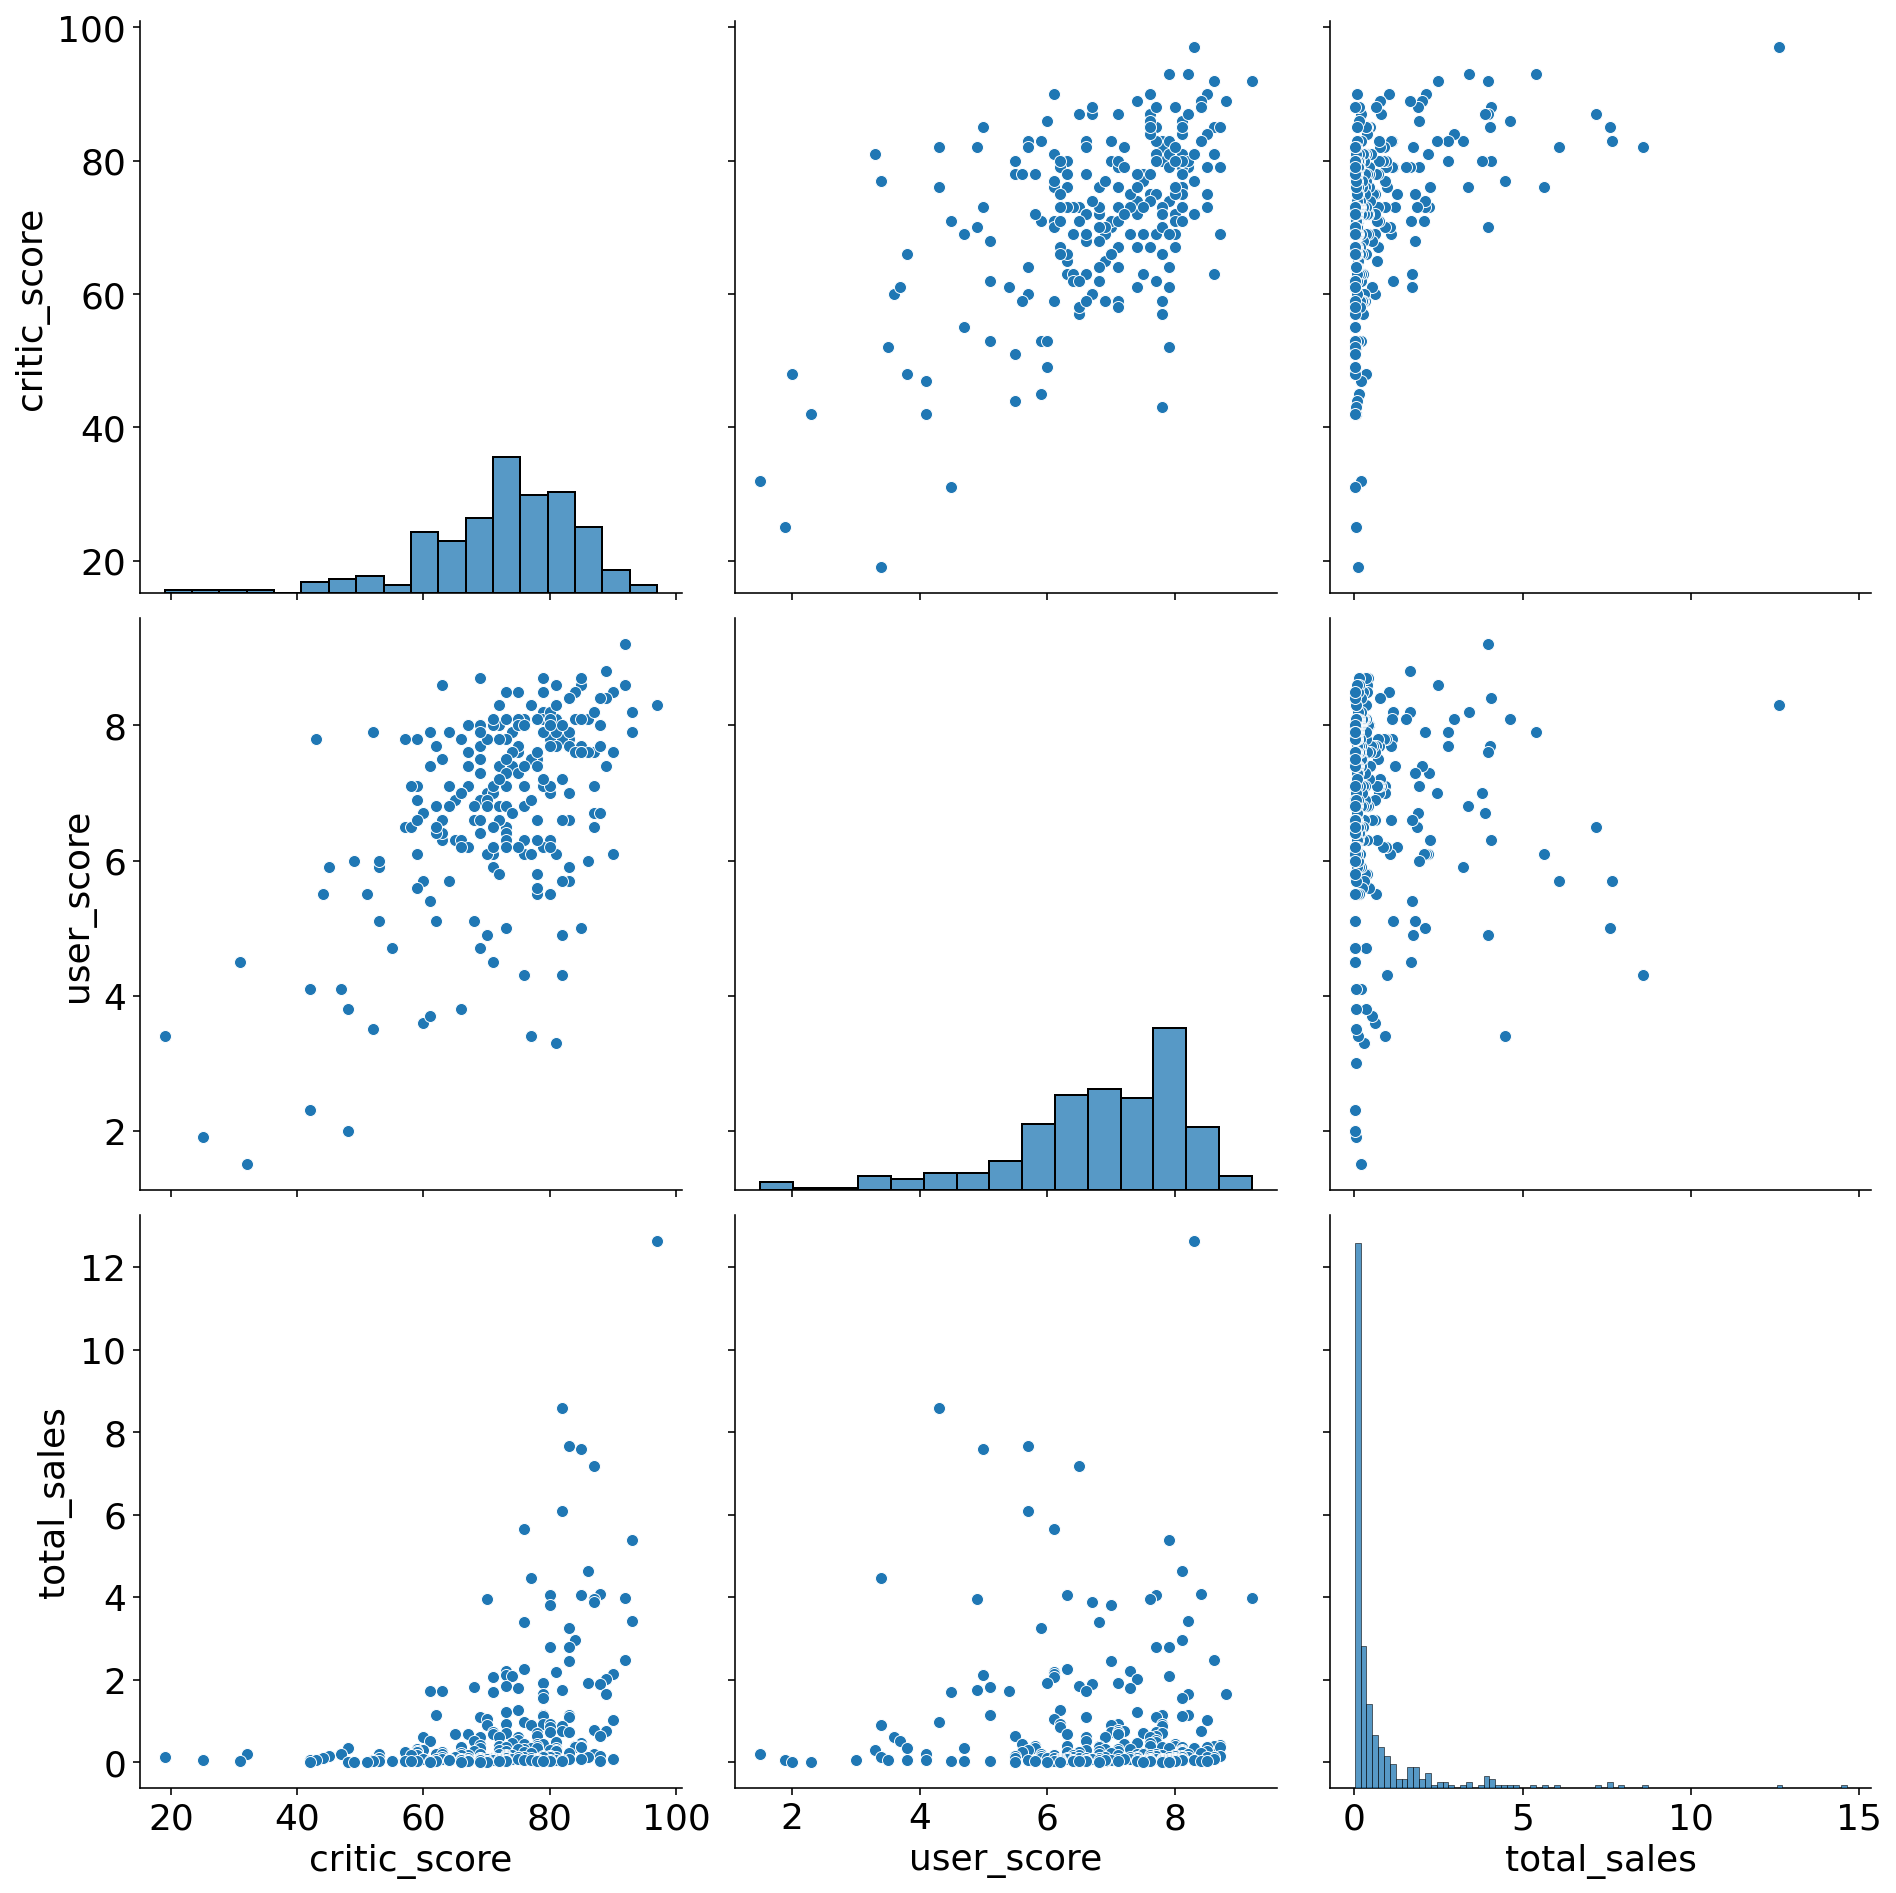

In [26]:
#pd.plotting.scatter_matrix(PS4_review, figsize=(10,10))
sns.pairplot(PS4_review, height=4.5)
plt.show()

Отдельно выведем графики типа 'scatter', чтобы визуально отследить наличие корреляции

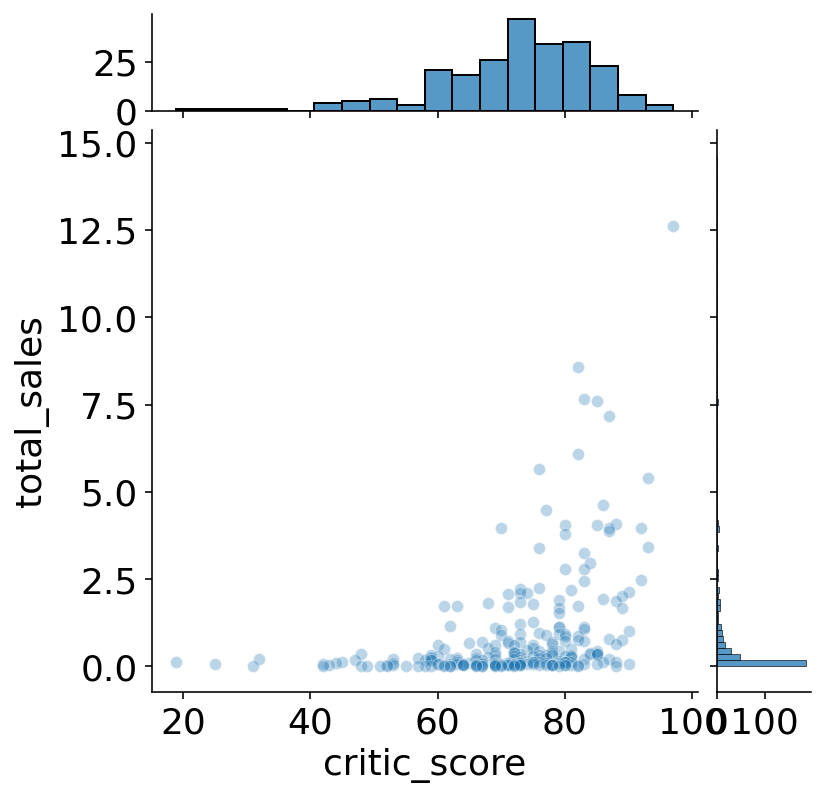

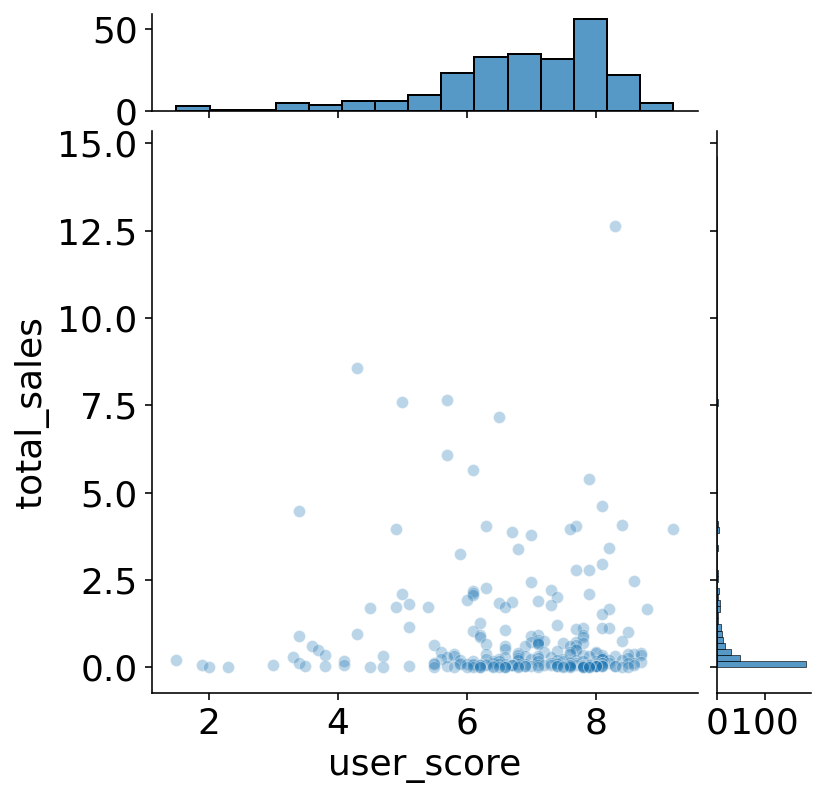

In [27]:
for i in ['critic_score','user_score']:
  sns.jointplot(data=PS4_review, x=i, y='total_sales', marginal_ticks=True, alpha=0.3)

**Вывод**: Полученные результаты свидетельствуют о наличии прямой умеренной линейной связи общих продаж и оценок критиков, в то время как с оценками пользователей этот параметр вообще не связан(по крайней мере линейно).   

Теперь для сравнения рассмотрим характеристики 5-ти крупнейших по общим продажам платформ за актуальный период:

In [28]:
for platform in top_5_actual_platform.index.to_list():
  print('\n',platform, '\n')
  display(actual_games.loc[actual_games['platform'] == platform, 'critic_score':'total_sales'].corr())


 PS4 



,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000



 XOne 



,critic_score,user_score,total_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
total_sales,0.428677,-0.070384,1.000000



 3DS 



,critic_score,user_score,total_sales
critic_score,1.000000,0.862485,0.314117
user_score,0.862485,1.000000,0.215193
total_sales,0.314117,0.215193,1.000000



 PS3 



,critic_score,user_score,total_sales
critic_score,1.000000,0.693445,0.446575
user_score,0.693445,1.000000,-0.166761
total_sales,0.446575,-0.166761,1.000000



 X360 



,critic_score,user_score,total_sales
critic_score,1.000000,0.625309,0.525723
user_score,0.625309,1.000000,-0.138445
total_sales,0.525723,-0.138445,1.000000


А также их графическое представление:

PS4


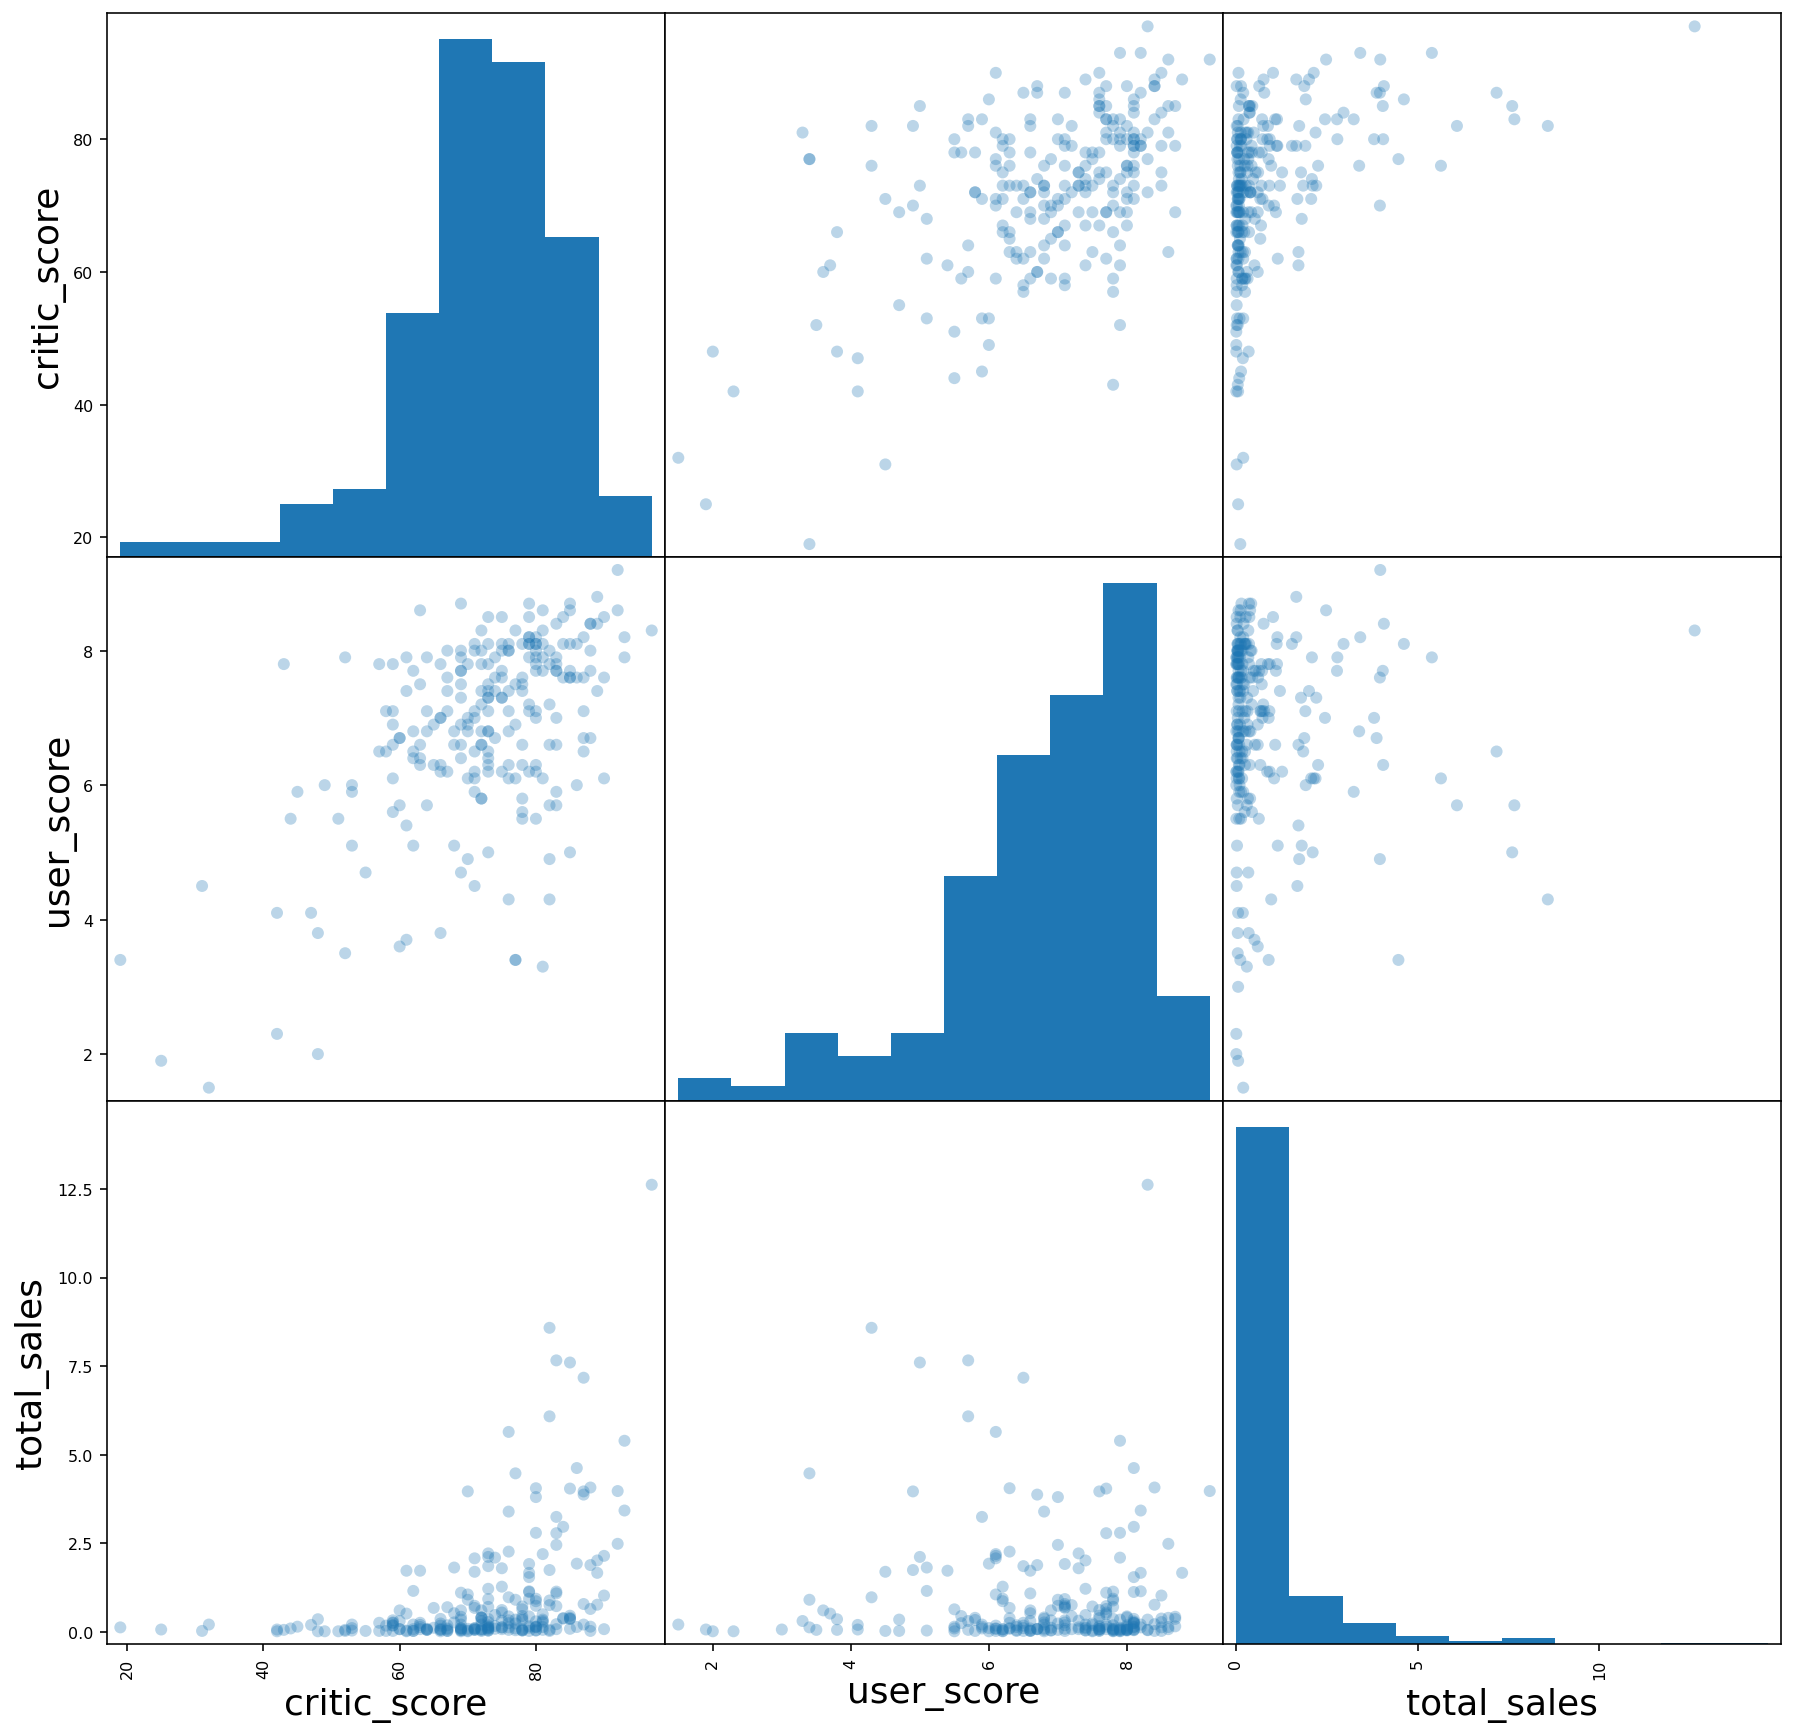

XOne


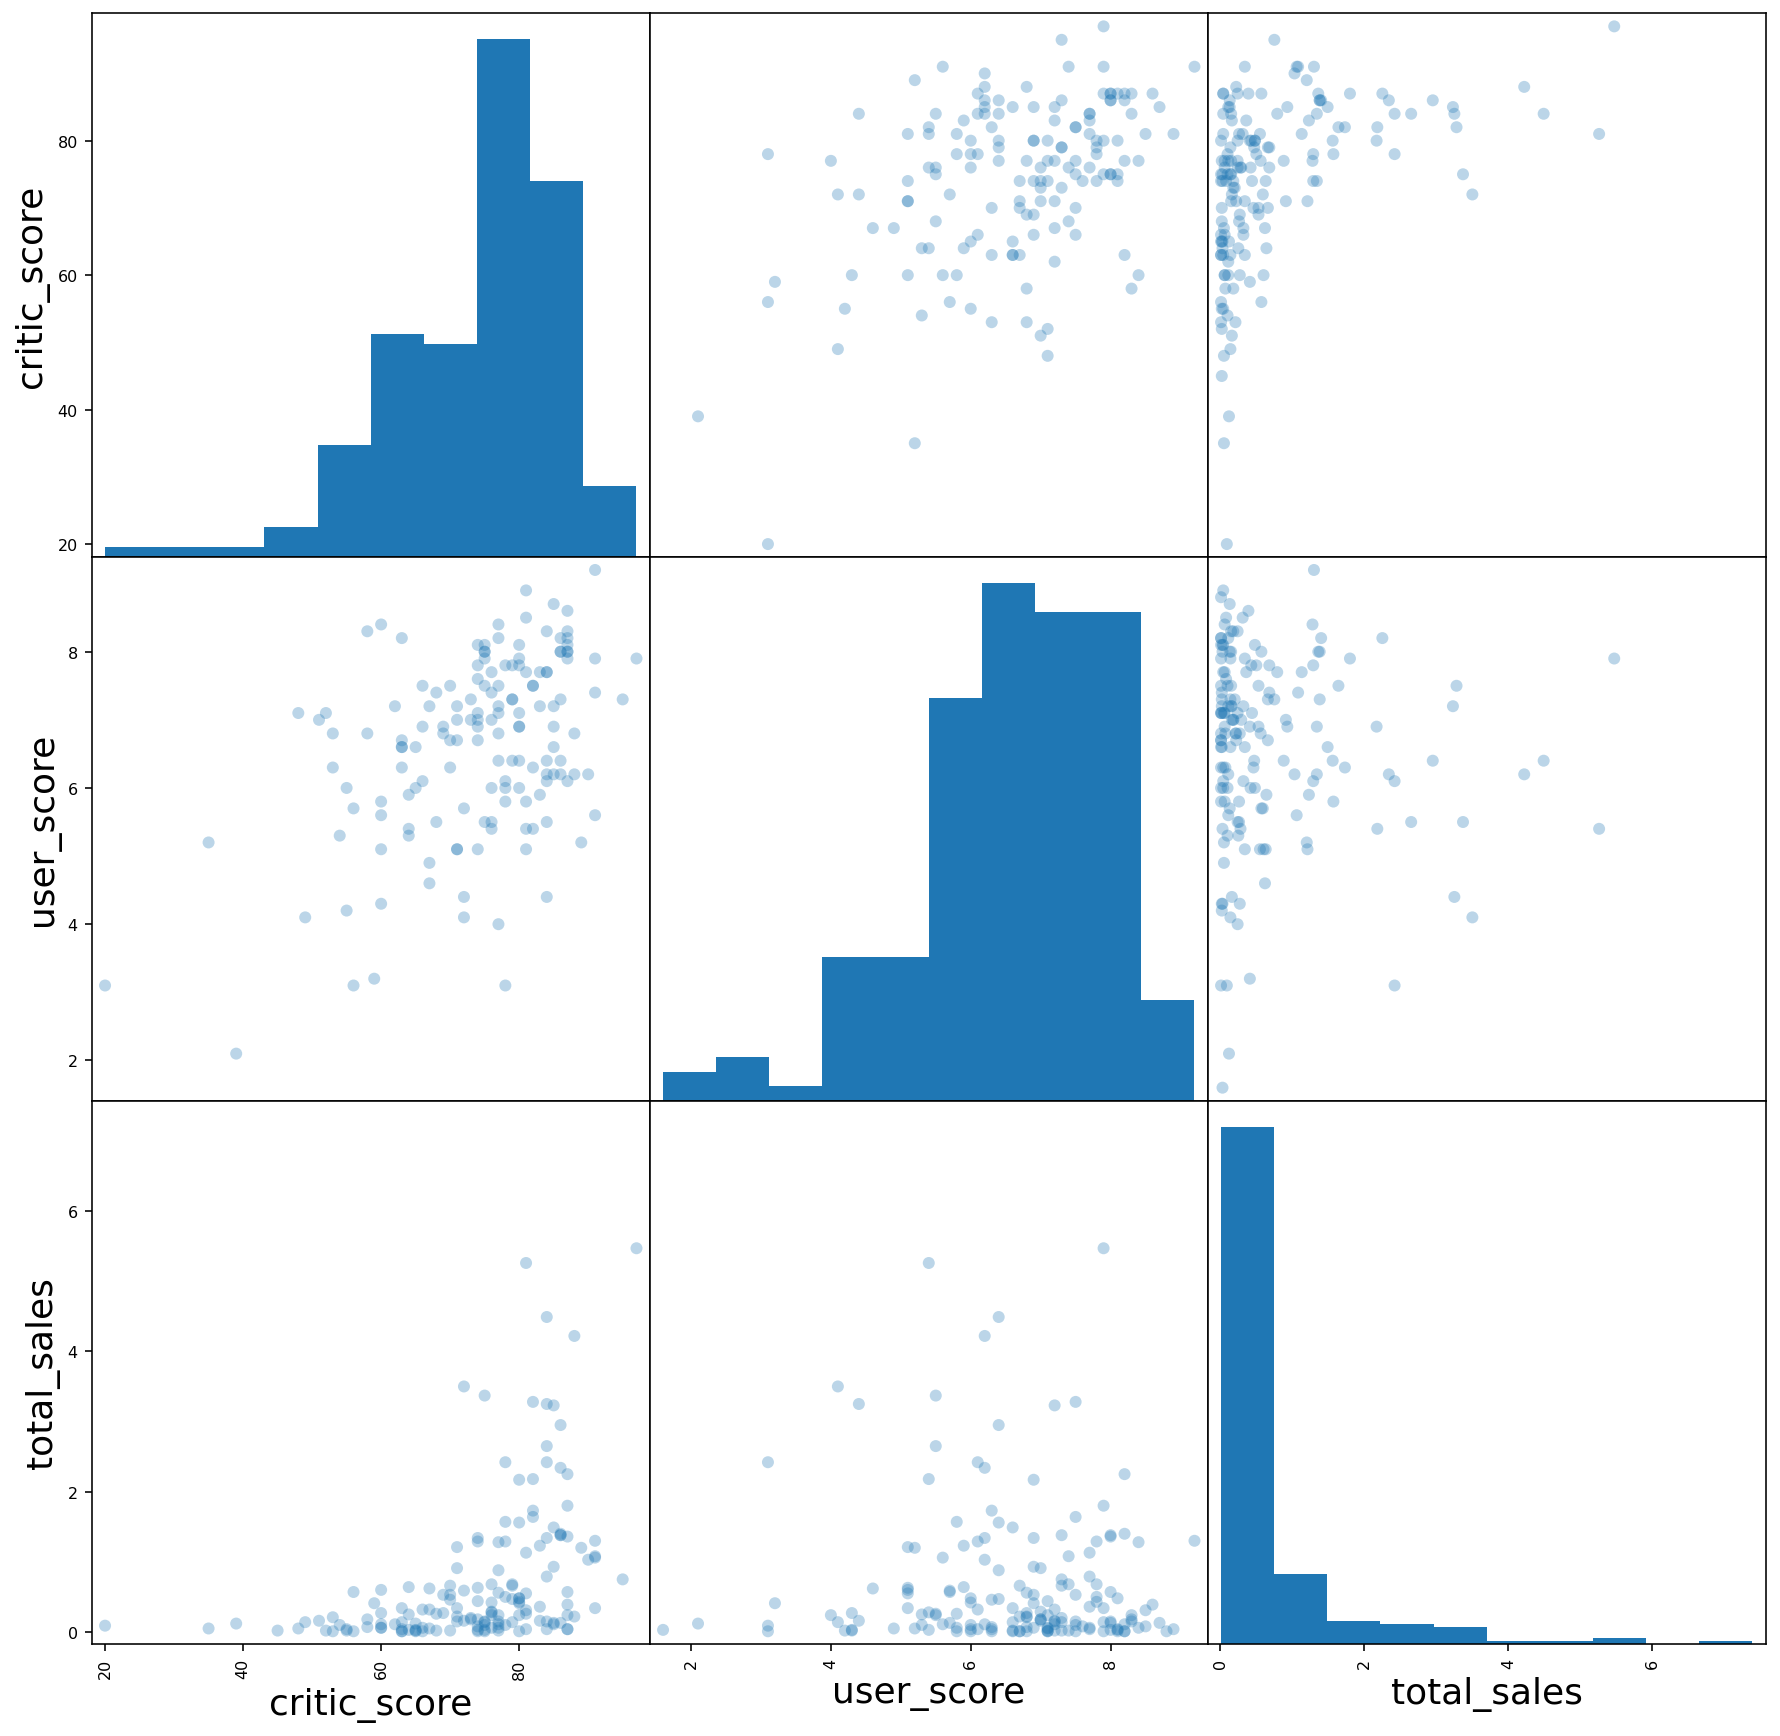

3DS


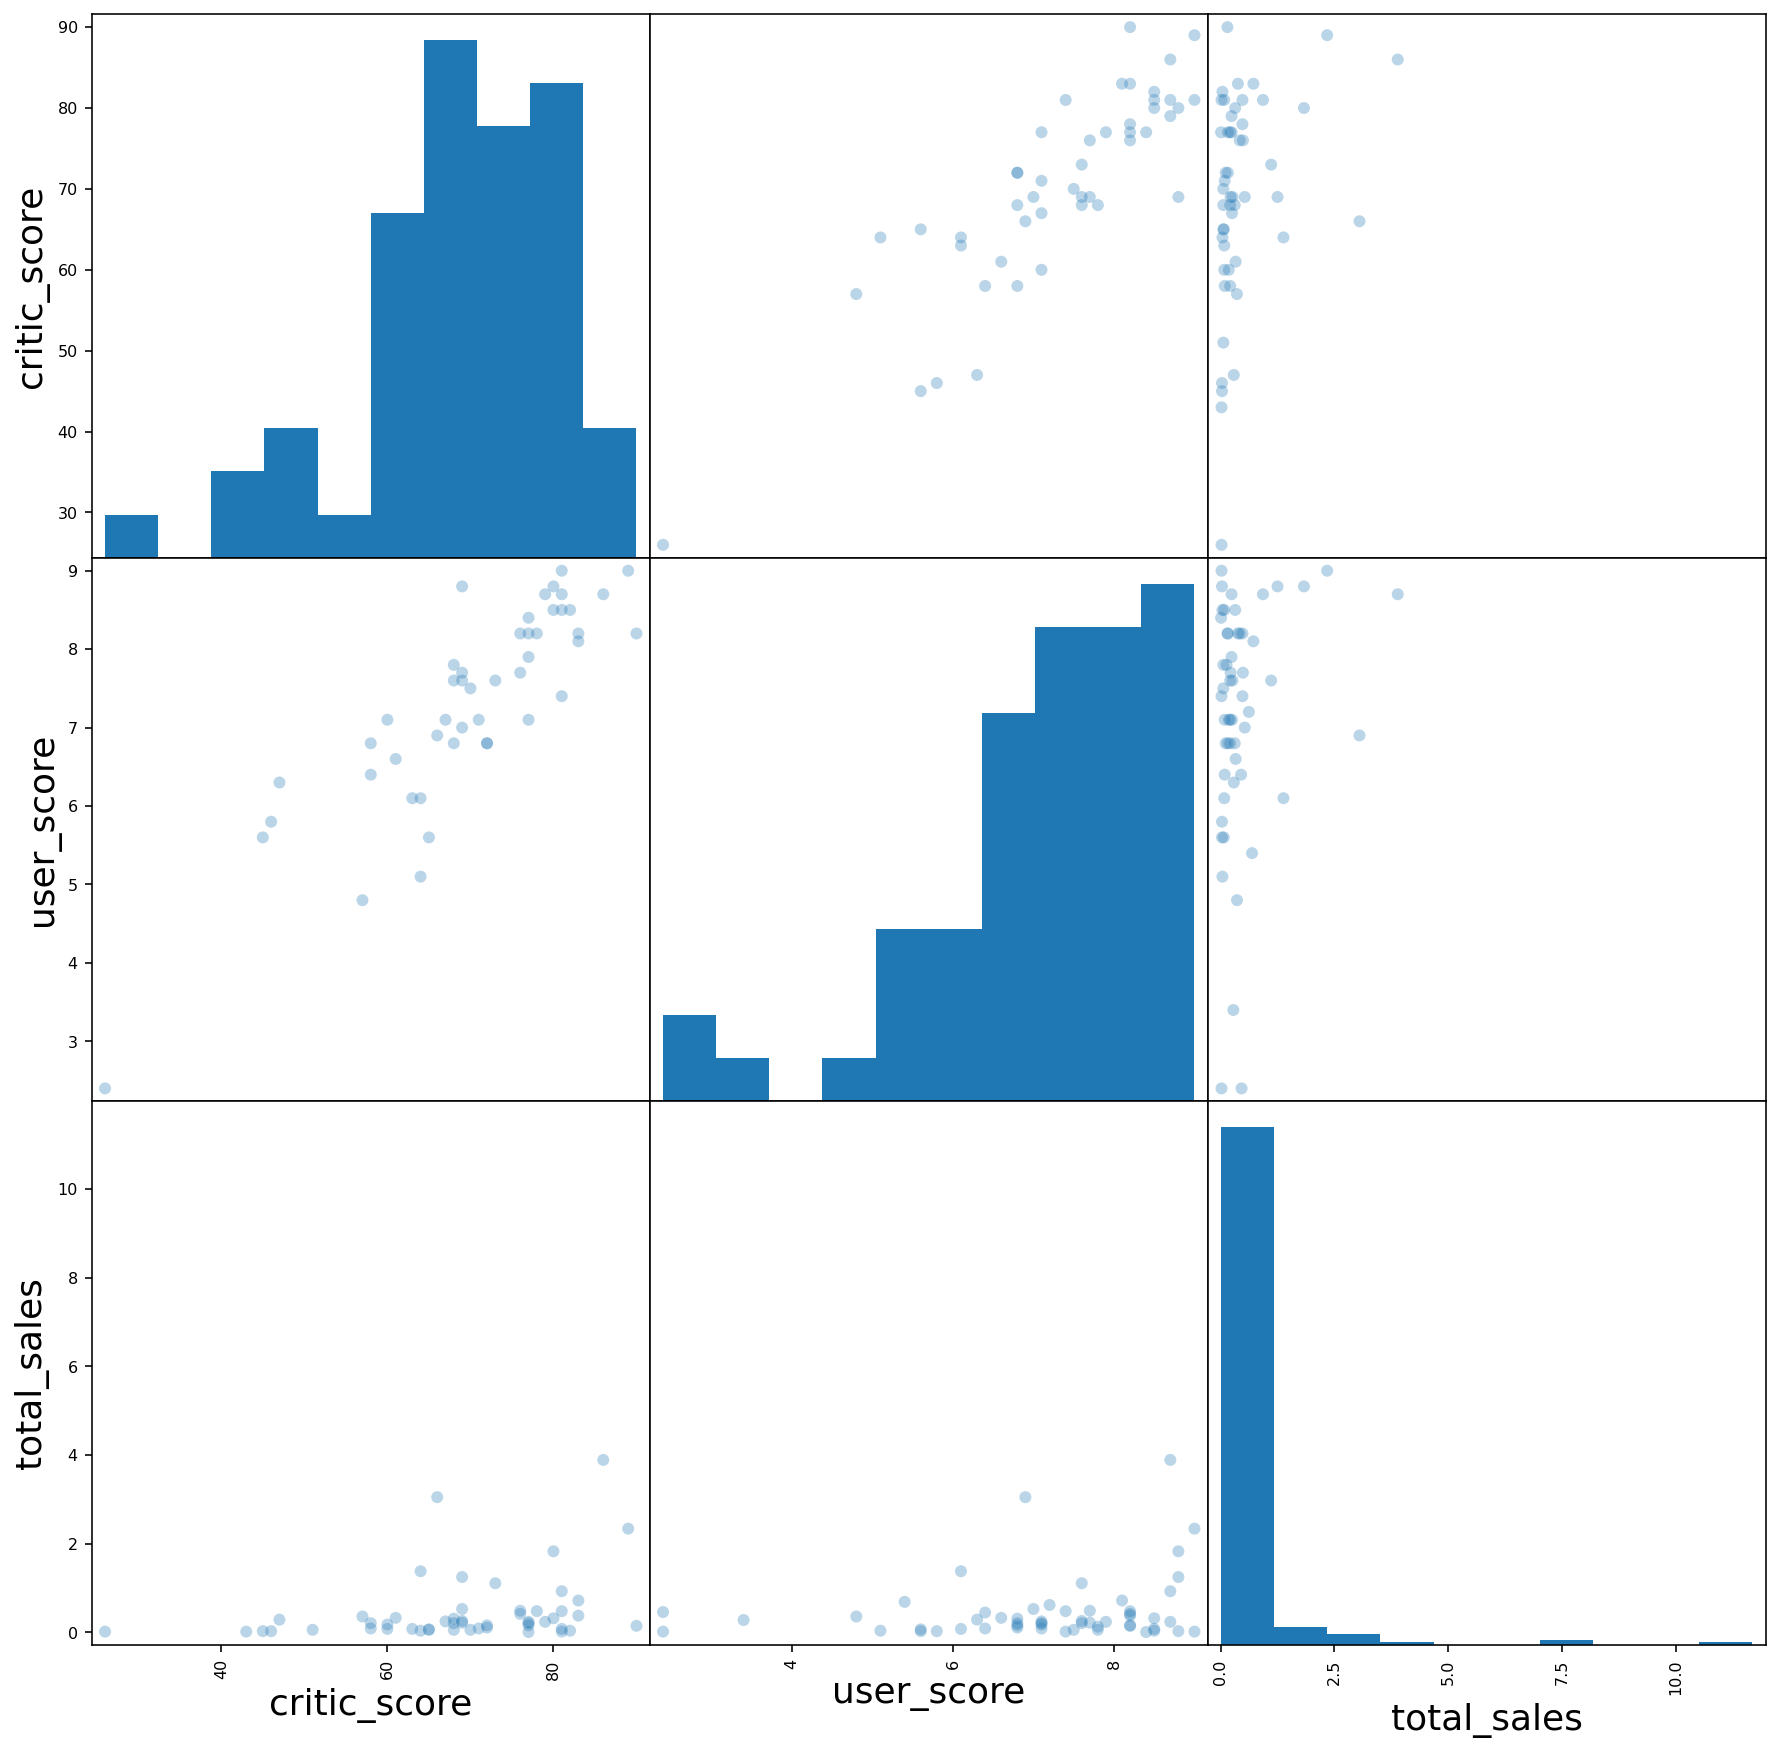

PS3


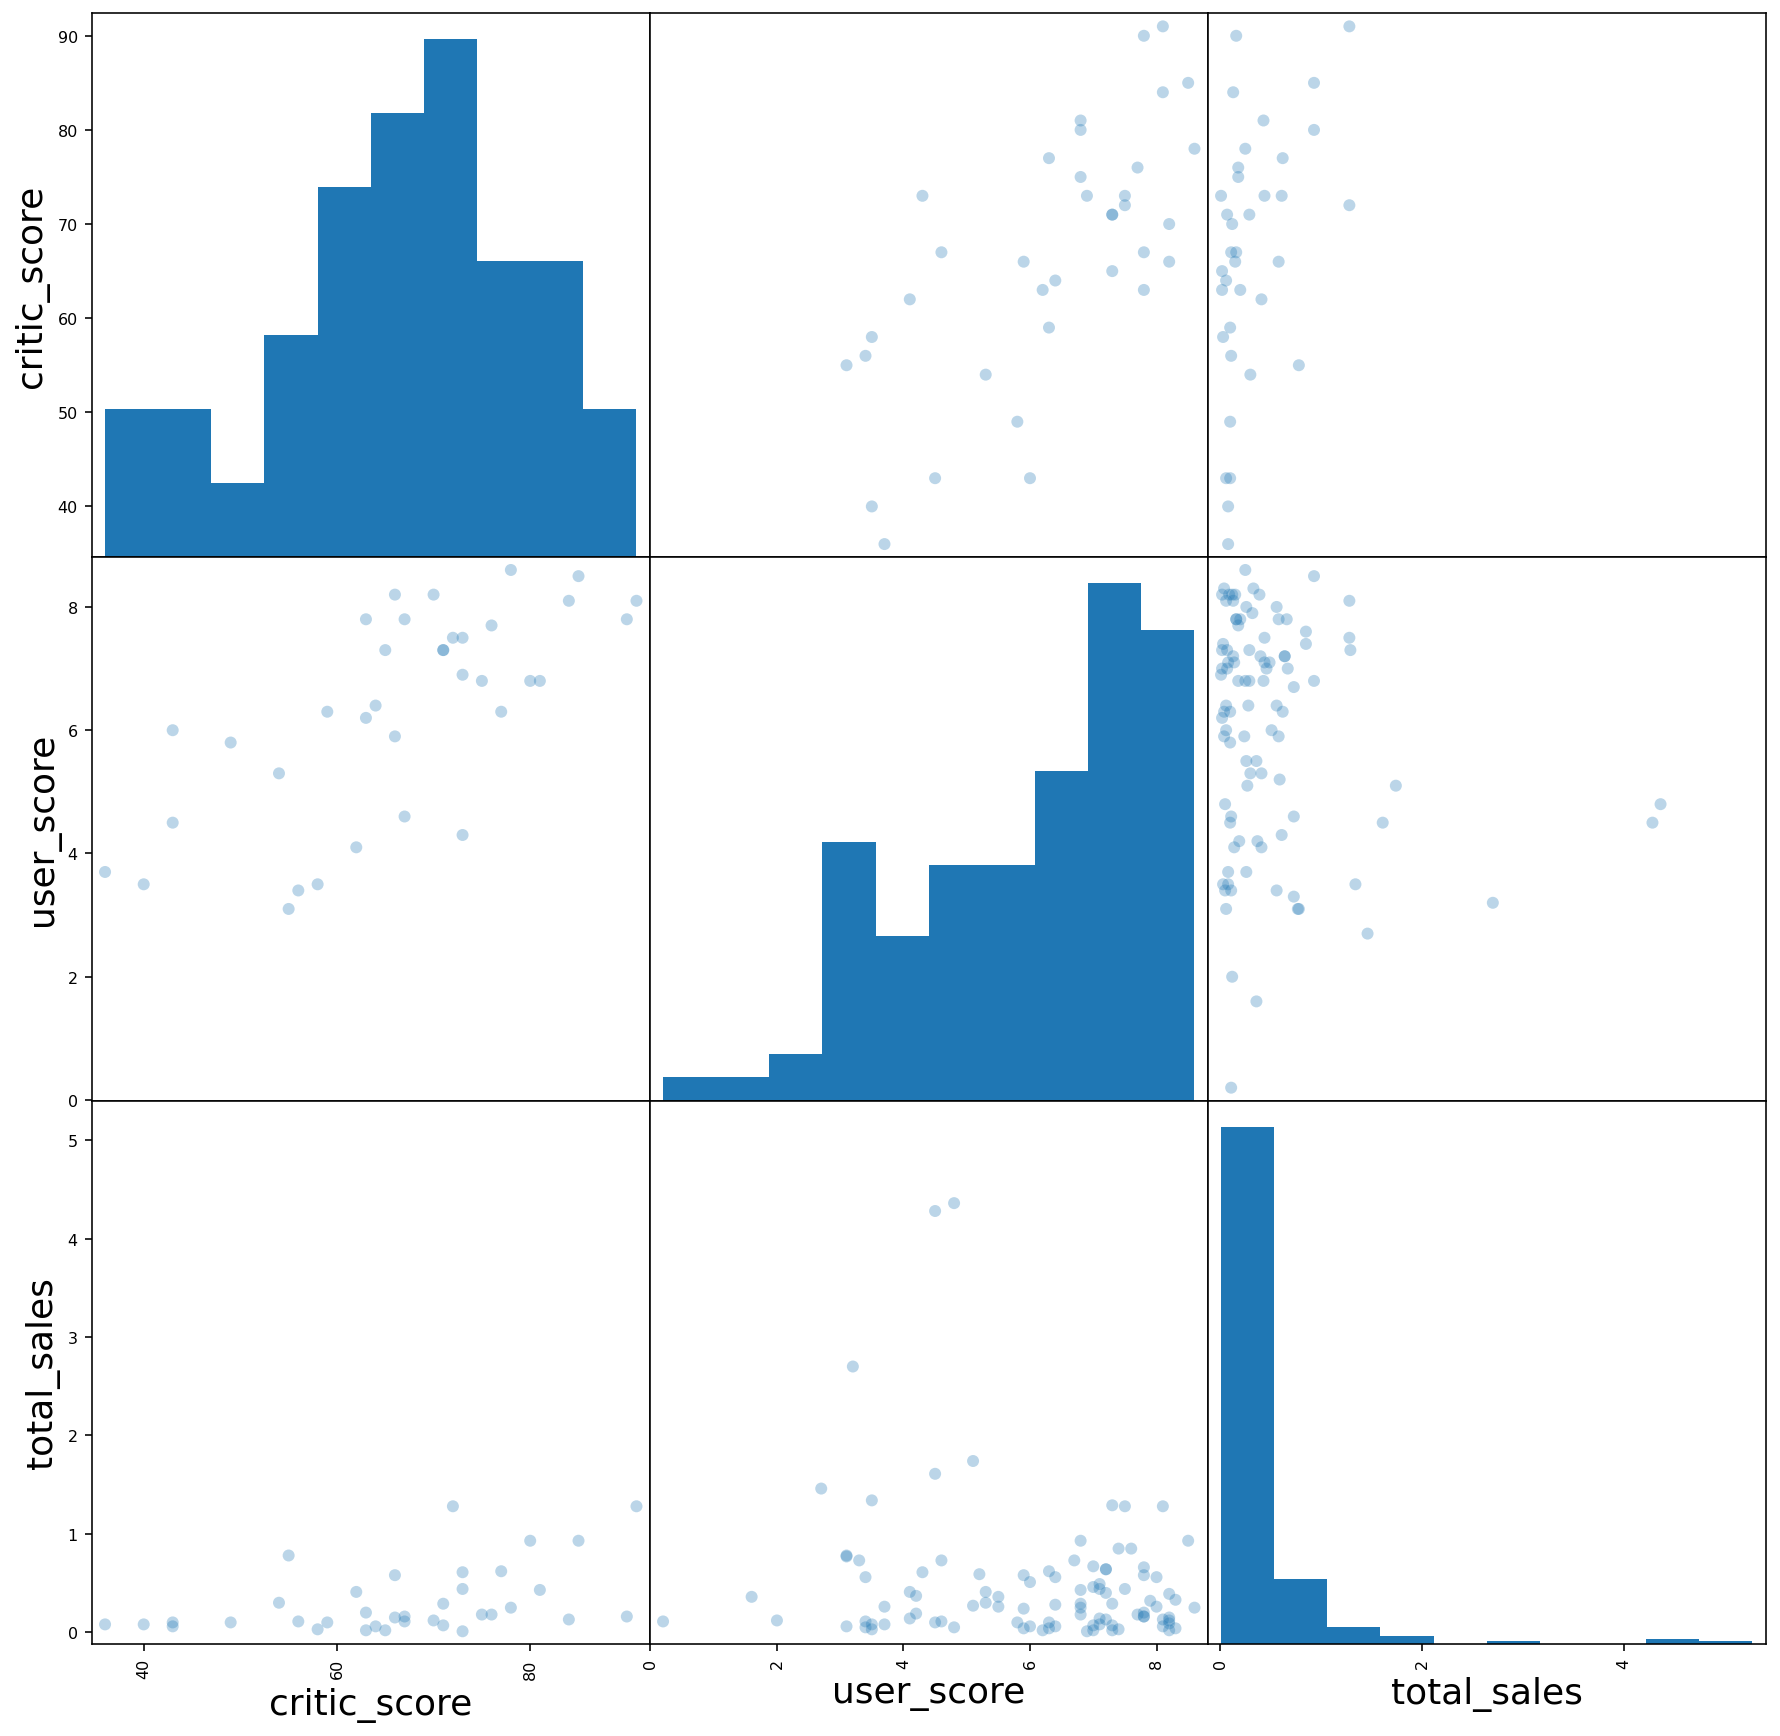

X360


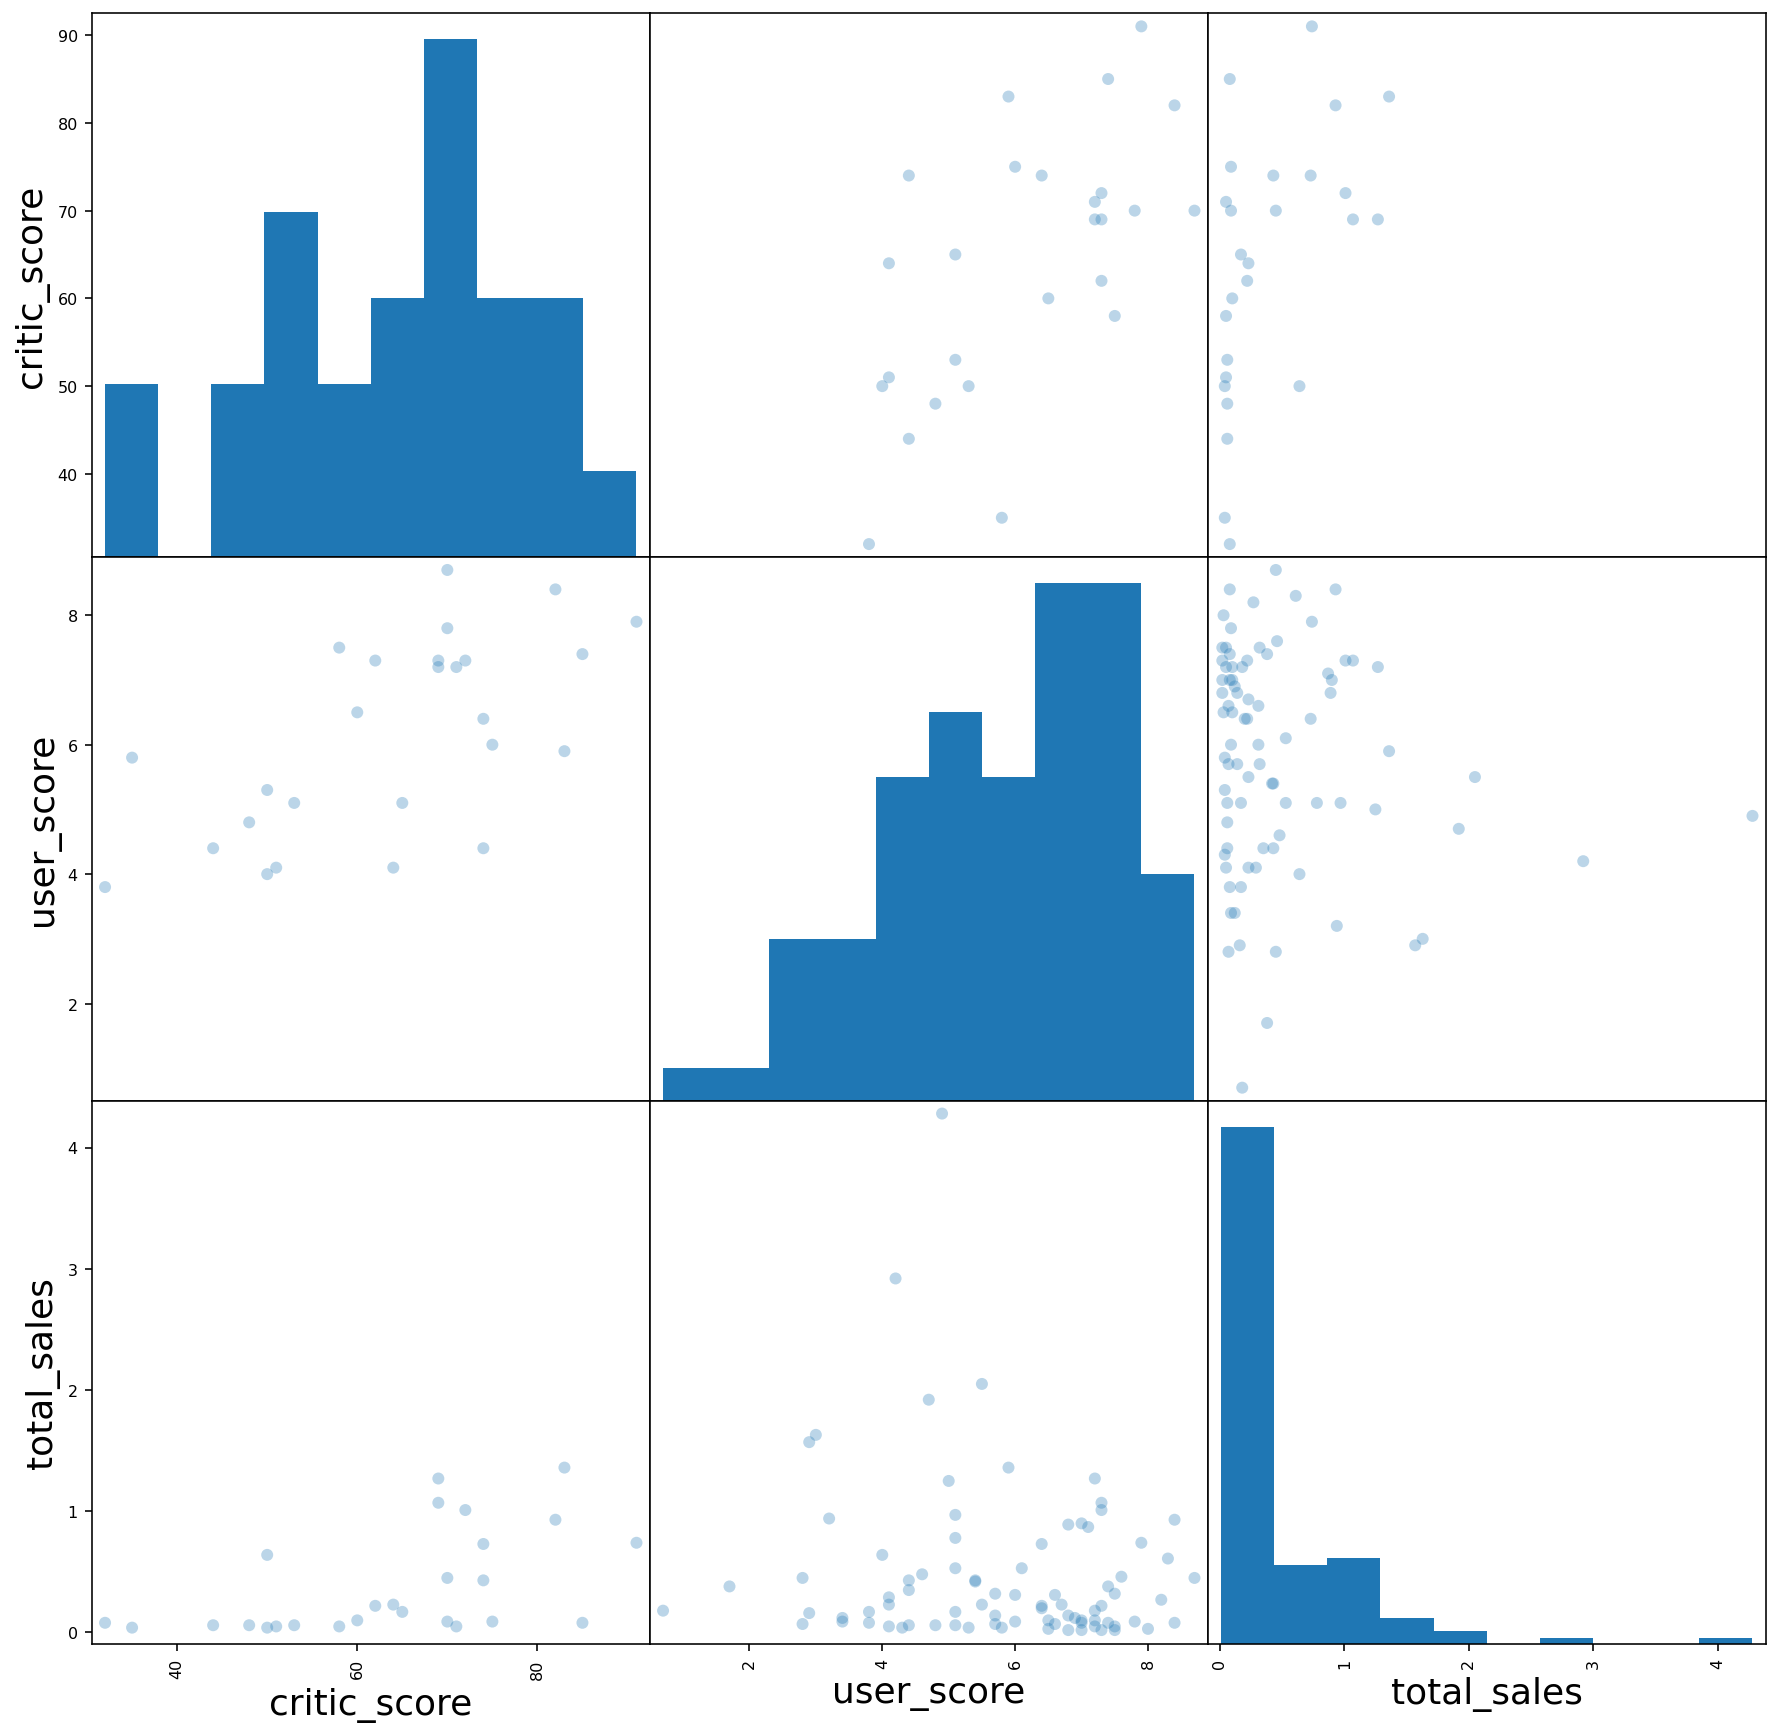

In [29]:
req = ['platform', 'critic_score', 'user_score', 'total_sales']
for i in top_5_actual_platform.index:
    print(i)
    ax = pd.plotting.scatter_matrix(
        actual_games.loc[actual_games.platform.isin([i]), req],
        figsize=(15,15),
        marker='o',
        alpha=0.3
    )
    plt.show()

**Вывод**: Для разных платформ, среди крупнейших пятёрки по общим продажам за актуальный период результаты оказались различны. Во всех случаях общие продажи имеют умеренную линейную положительную связь с отзывами критиков, однако в случае первых 3-х платформ(PS3, PS4, X360, XOne) нельзя установить зависимость с отзывами пользователей, но вот для более компактных платформ (3DS) связь хоть и слаба, но присутствует.

## Распределение игр по жанрам

Разобьём продажи по всем регионам на несколько диапазонов по проданным млн. копий:

/tmp/ipykernel_160/3238226932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_games['sale_category'] = pd.cut(actual_games['total_sales'], bins=[0, 0.1, 0.5, 1, 2, 5, 10, 15])


<AxesSubplot:xlabel='Диапазон продаж, млн. копий', ylabel='Количество игр, ед.'>

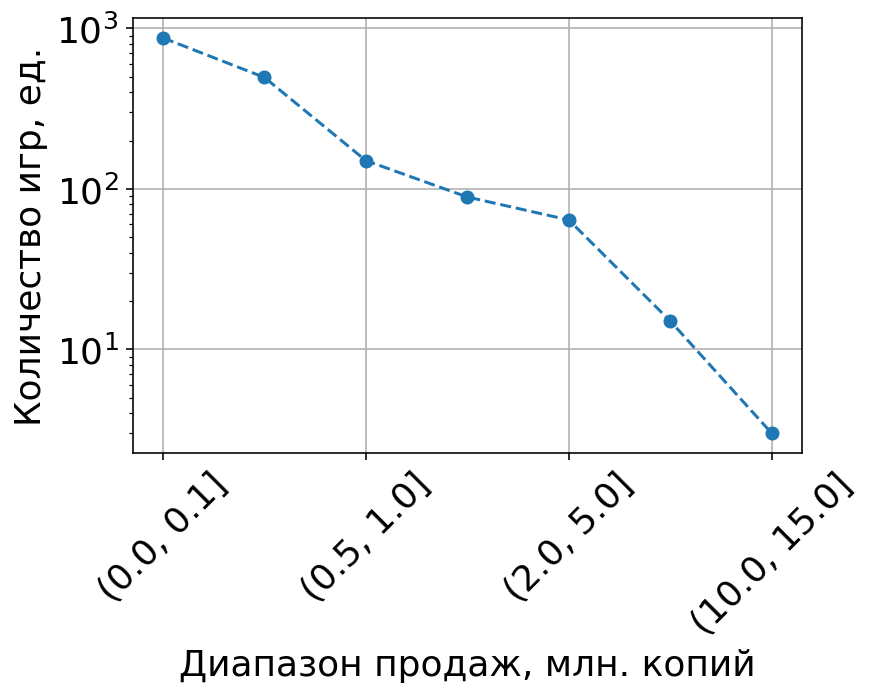

In [30]:
actual_games['sale_category'] = pd.cut(actual_games['total_sales'], bins=[0, 0.1, 0.5, 1, 2, 5, 10, 15])
actual_games['sale_category'].value_counts().plot(
    grid=True,
    logy=True,
    style='--o',
    rot=45,
    xlabel='Диапазон продаж, млн. копий',
    ylabel='Количество игр, ед.'
)

Получается что больше всего игр с продажами до 100000 копий, в то время как игр, с продажами от 10 до 15 млн. копий всего несколько штук. Для более качественного представления о распределении различных игровых жанров по ээтим диапазонов, построим несколько графиков.  

В этом случае представлен график, отражающий сколько игр и в каких жанрах принадлежит каждому из диапазонов по проданным копиям:

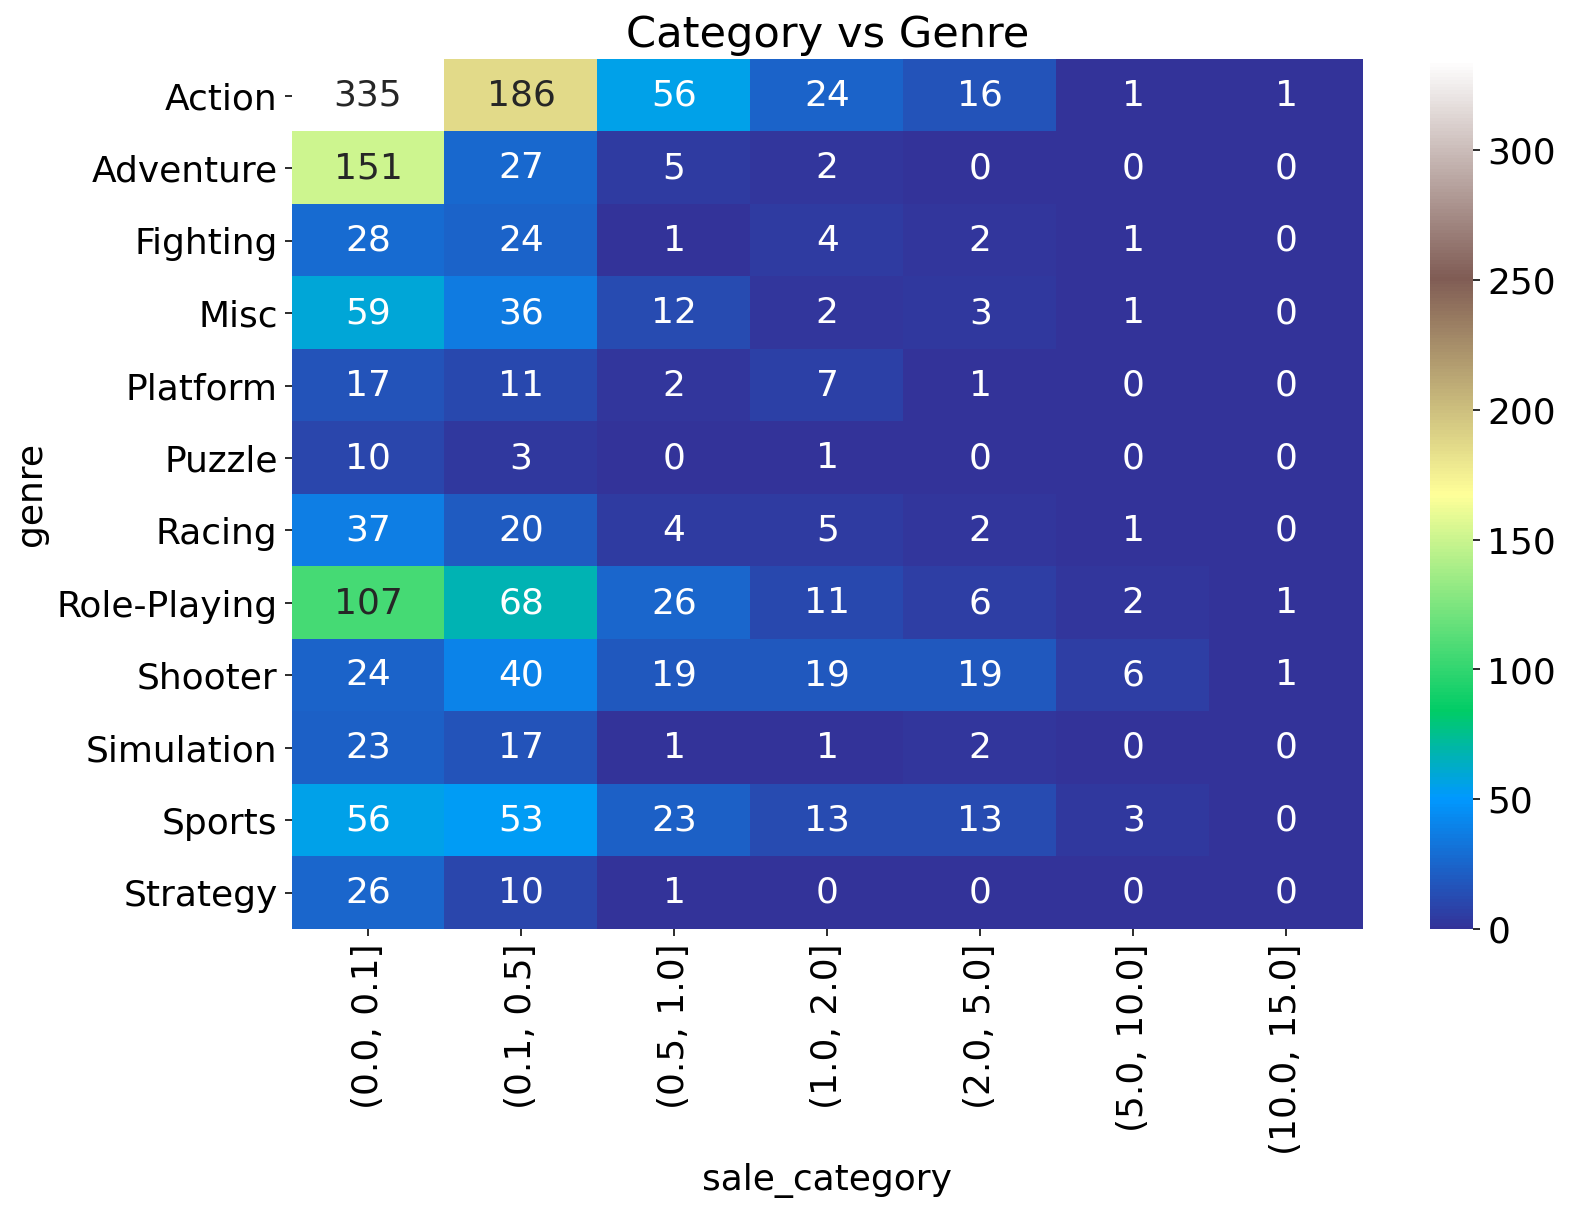

In [31]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(actual_games.pivot_table(
    index='genre',
    columns='sale_category',
    values='total_sales',
    aggfunc='count'
),annot=True, fmt='d', cmap='terrain')
ax.set(title='Category vs Genre')
plt.show()

5 финалистов: Action, Role-Playing, Adventure, Sports и Shooter. Игр в жарне Action значительно больше, в сравнении с остальными кандидатами, однако значительная их часть находится в слева, что означает, что игры этого жанра больше берут количеством, а не качеством.

Теперь на графике отразим суммарные продажи для каждого жанра в каждом диапазоне:

<AxesSubplot:xlabel='sale_category', ylabel='genre'>

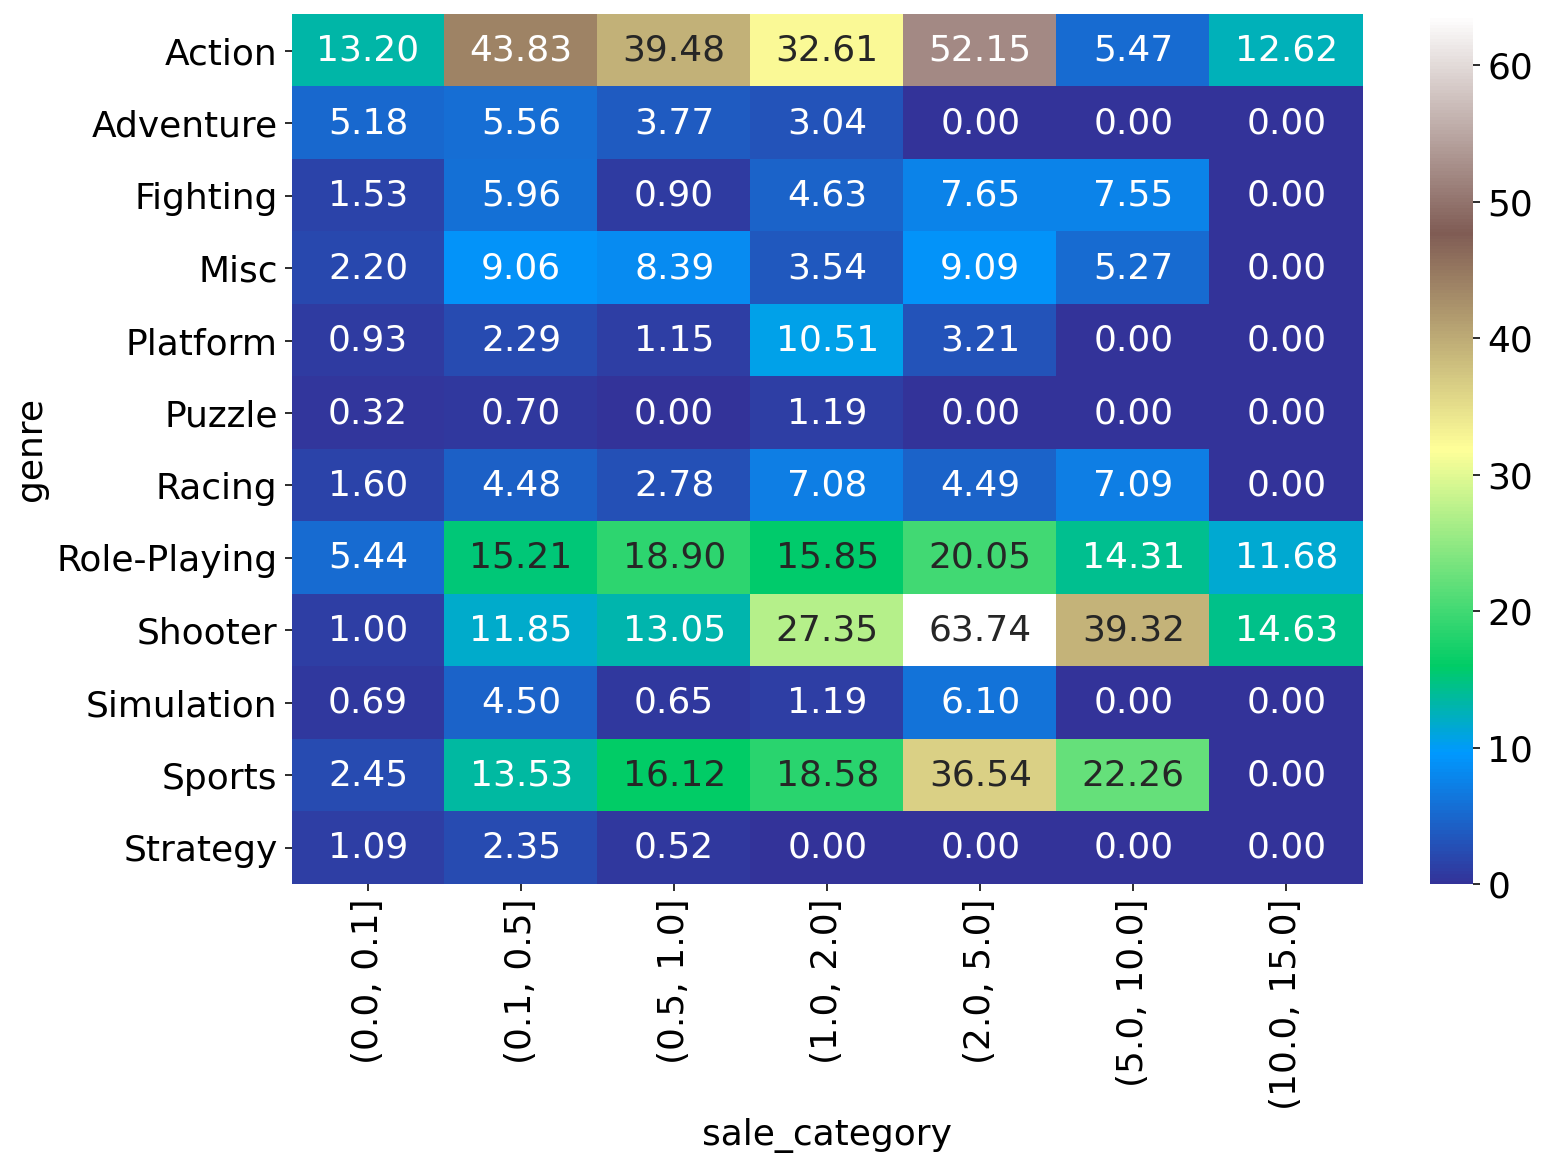

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(actual_games.pivot_table(
    index='genre',
    columns='sale_category',
    values='total_sales',
    aggfunc='sum'
),annot=True, fmt='.2f', cmap='terrain')

Здесь наблюдаем, что большую часть продаж жанра Action дают игры с диапазоне продаж (0.1, 5] млн. копий, когда как Shooter получает деньги за игры, продающиеся от 1 до 10 млн копий. Хорошую планку также держат Sports, Role-Playing и Misc.

Для подведения итогов выводим графики с общими результатами:

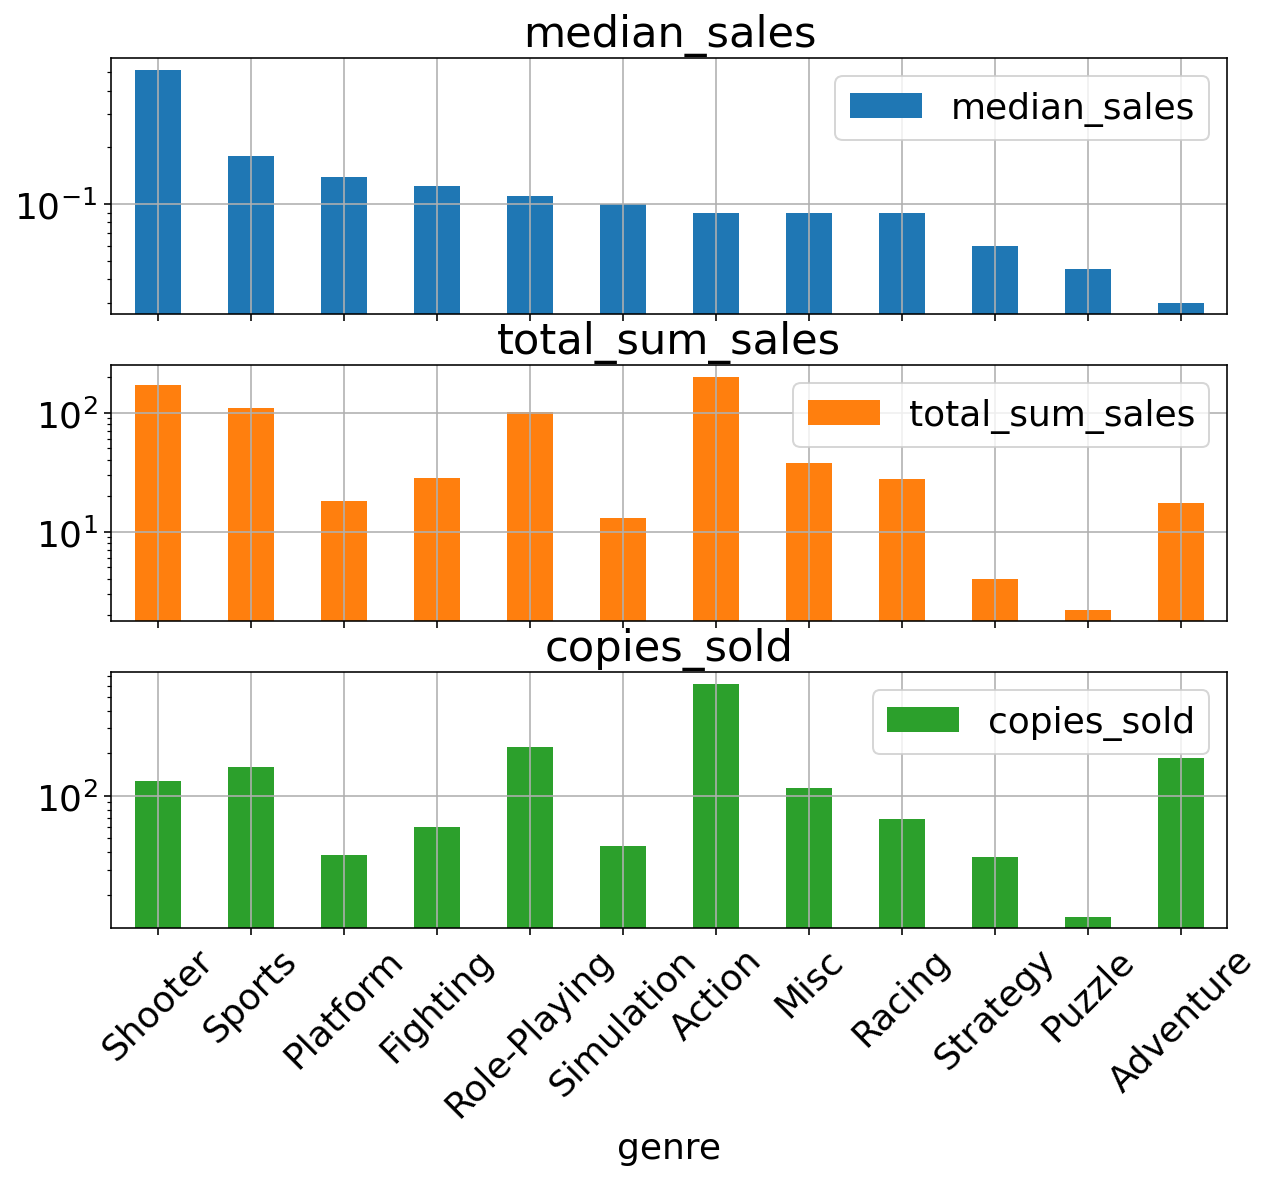

In [33]:
genres_stat = actual_games.pivot_table(index='genre', values='total_sales', aggfunc=['median', 'sum', 'count'])
genres_stat.columns = ['median_sales', 'total_sum_sales', 'copies_sold']
(
    genres_stat.sort_values(by='median_sales', ascending=False)
    .plot(kind='bar', figsize=(10,8), logy=True, grid=True, rot=45, subplots=True)
)
plt.show()

В табличном представлении:

In [34]:
genres_stat.sort_values(by='median_sales', ascending=False)

,median_sales,total_sum_sales,copies_sold
genre,,,
Shooter,0.515,170.94,128
Sports,0.180,109.48,161
Platform,0.140,18.09,38
Fighting,0.125,28.22,60
Role-Playing,0.110,101.44,221
Simulation,0.100,13.13,44
Action,0.090,199.36,619
Misc,0.090,37.55,113
Racing,0.090,27.52,69


**Вывод**: анализ данных показывает, что в топ 5 самых потенциально прибыльных жанров входят: Shooter, Sports, Platform, Fighting, Role-Playing. Это означает, что удельные продажи игр этих жанров(то есть приходящиеся на одно игровое наименование) самые высокие среди представленных жанров. В этом смысле игра тем стабильней по доходу, чем больший доход при наименьшем числе проданных копий она зарабатывает. Именно поэтому, несмотря на большие суммы и количество проданных игр, Action оказался вне этого списка, так как в среднем одна игра этого жанра продаст копий в несколько раз меньше, чем Shooter.

## **Портрет пользователя каждого региона**

### Регион NA

Топ 5 платформ по продажам:

<AxesSubplot:xlabel='platform', ylabel='Доля от общего \nкол-ва проданных копий'>

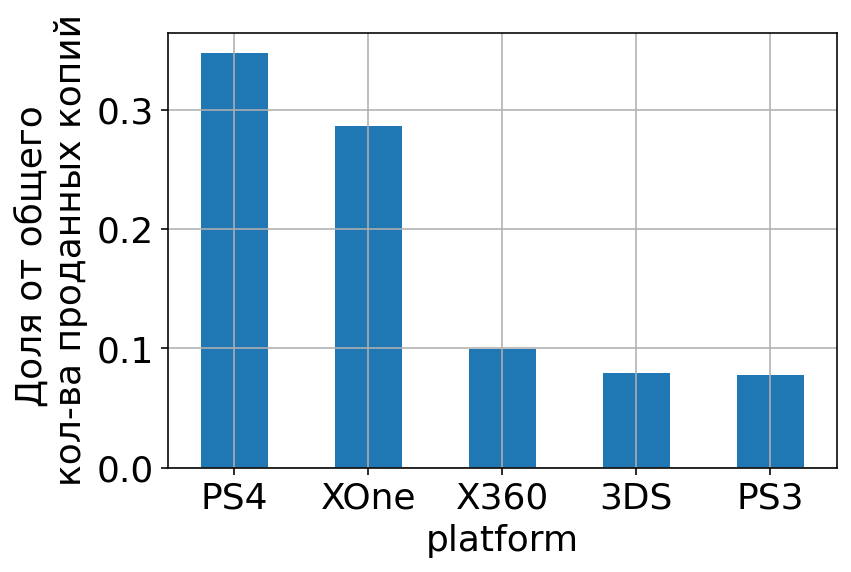

In [35]:
((actual_games.groupby('platform')['na_sales'].agg('sum')/actual_games['na_sales'].sum())
 .sort_values(ascending=False)).head().plot.bar(grid=True, rot=0, ylabel='Доля от общего \nкол-ва проданных копий')

Топ 5 жанров по продажам:

<AxesSubplot:xlabel='genre', ylabel='Доля от общего \nкол-ва проданных копий'>

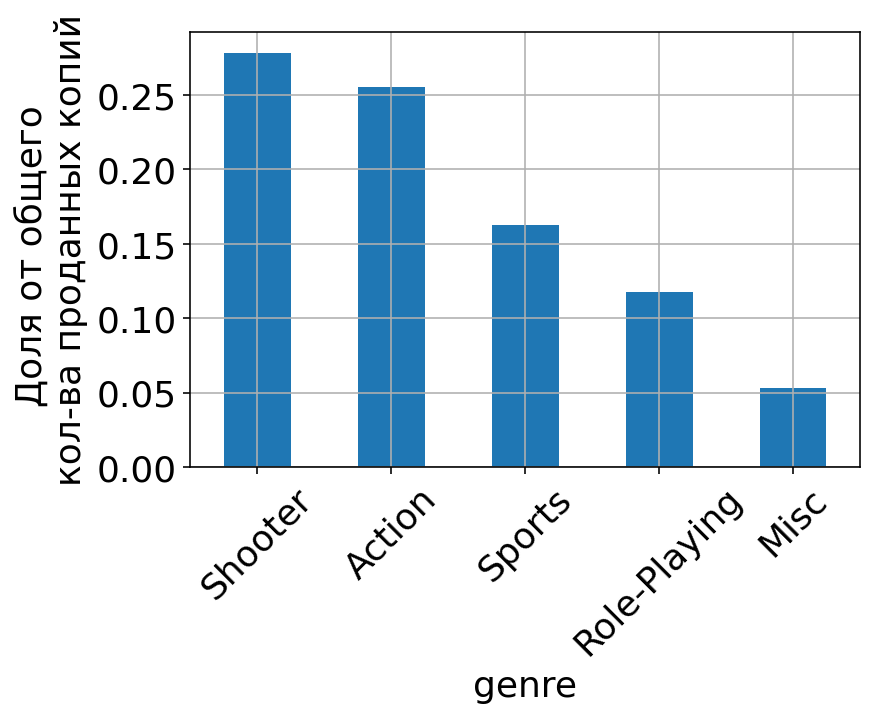

In [36]:
((actual_games.groupby('genre')['na_sales'].agg('sum')/actual_games['na_sales'].sum())
 .sort_values(ascending=False)).head().plot.bar(grid=True, rot=45, ylabel='Доля от общего \nкол-ва проданных копий')

Распределение рейтинга в зависимости от продаж:

<AxesSubplot:xlabel='rating', ylabel='Доля от общего \nкол-ва проданных копий'>

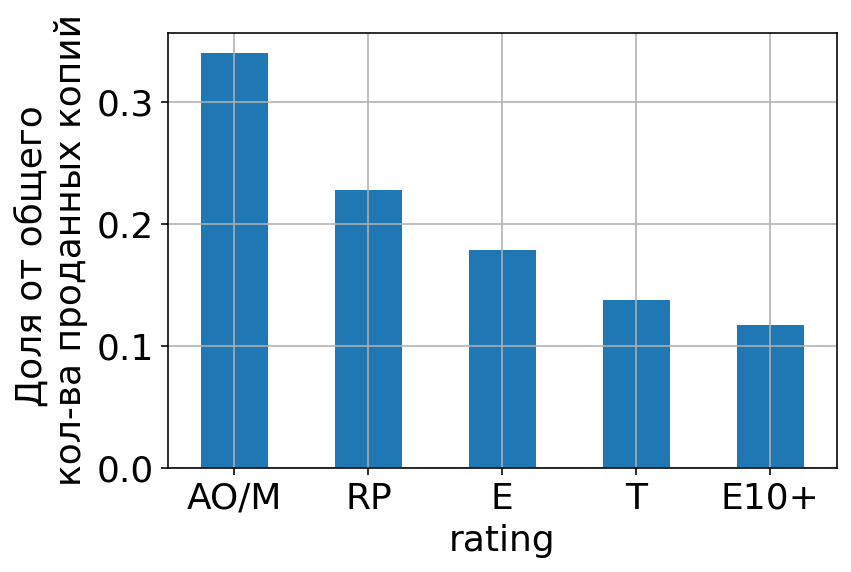

In [37]:
((actual_games.groupby('rating')['na_sales'].agg('sum')/actual_games['na_sales'].sum())
 .sort_values(ascending=False)).plot.bar(grid=True, rot=0, ylabel='Доля от общего \nкол-ва проданных копий')

**Вывод**:
- *Платформы*: PS4, XOne - самые распространённые(37.4% и 28.6%), X360, 3DS, PS3 - примерно в 3 раза меньше распространены, чем лидеры. Всё кроме 3DS - игровые станции; 
- *Жанры*: верхние строчки списка у наиболее затратных по вниманию и активных жарнов - Shooter и Action(больше 20 %), на Sport и R-P меньше 20% и 5.3% на Misc;
- *Рейтинг*: наибольшую долю проданных игр составляют игры с рейтингом Adult Only/Mature(что неудивительно, учитывая самые популярные жанры игр этого региона), на безрейтенговые игры - 22.8 %, ещё меньше - подростки и 10+ (13.7% и 11.7% соответственно). Выходит что среди геймеров этого региона много совершеннолетних.

### Регион EU

Топ 5 платформ по продажам:

<AxesSubplot:xlabel='platform', ylabel='Доля от общего \nкол-ва проданных копий'>

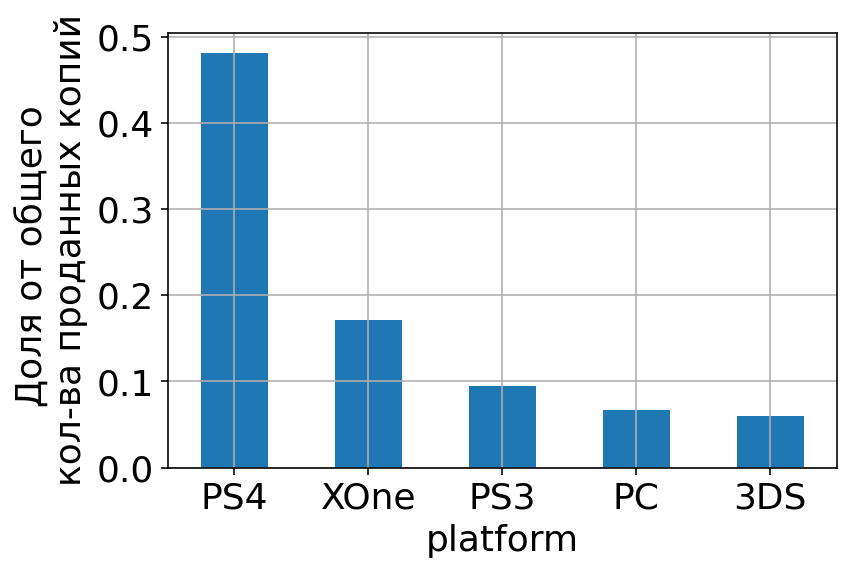

In [38]:
((actual_games.groupby('platform')['eu_sales'].agg('sum')/actual_games['eu_sales'].sum())
 .sort_values(ascending=False).head()).plot.bar(grid=True, rot=0, ylabel='Доля от общего \nкол-ва проданных копий')

Топ 5 жанров по продажам:

<AxesSubplot:xlabel='genre', ylabel='Доля от общего \nкол-ва проданных копий'>

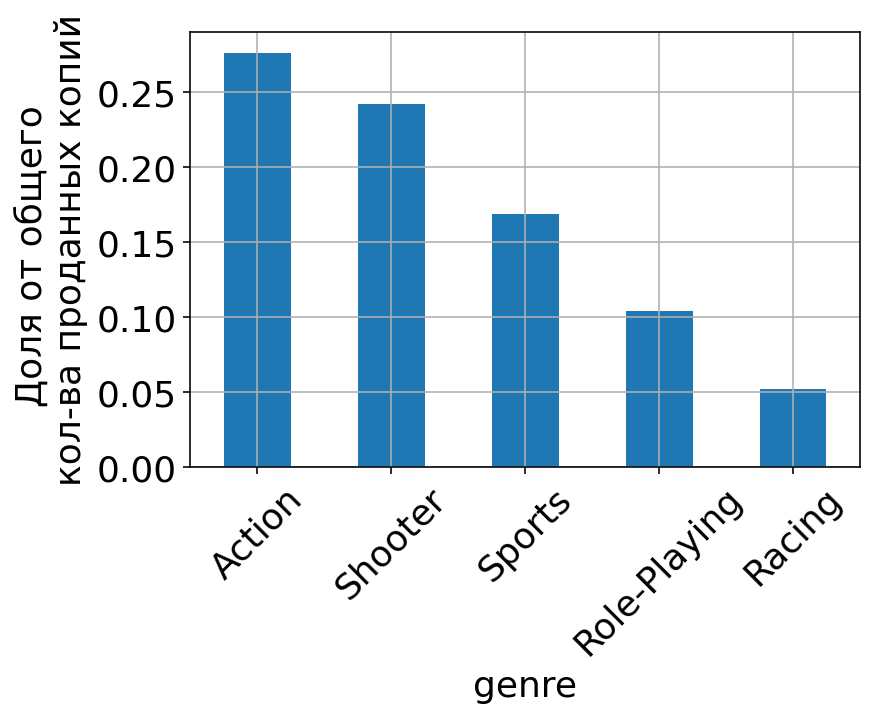

In [39]:
((actual_games.groupby('genre')['eu_sales'].agg('sum')/actual_games['eu_sales'].sum())
 .sort_values(ascending=False).head()).plot.bar(grid=True, rot=45, ylabel='Доля от общего \nкол-ва проданных копий')

Распределение рейтинга в зависимости от продаж:

<AxesSubplot:xlabel='rating', ylabel='Доля от общего \nкол-ва проданных копий'>

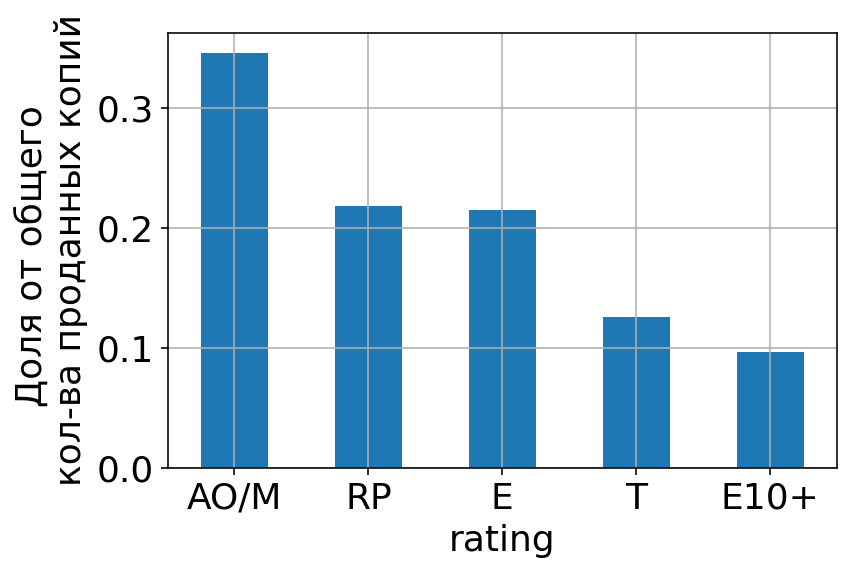

In [40]:
((actual_games.groupby('rating')['eu_sales'].agg('sum')/actual_games['eu_sales'].sum())
 .sort_values(ascending=False)).plot.bar(grid=True, rot=0, ylabel='Доля от общего \nкол-ва проданных копий')

**Вывод**:
- *Платформы*: самой распространённой платформой можно назвать PS4, 48 % всех продаж приходятся на неё, а в целом 75% продаж приходится на игровые консоли,а компьютеры и портативные устройства занимают всего лишь в районе 6-6.5%.
- *Жанры*: охотно покупают Action и Shooter, чуть реже Sport и R-P, на последнем месте Racing, на все эти жанры приходится 84% всех проданных копий;
- *Рейтинг*: наибольшую долю проданных игр составляют игры с классом Adults Only/Mature (что неудивительно, учитывая самые популярные жанры игр), по 21.5 % игр приходится на безрейтинговые и для всех возрастов, игры для детей и подростков продаются хуже.

### Регион JP

Топ 5 платформ по продажам:

<AxesSubplot:xlabel='platform', ylabel='Доля от общего \nкол-ва проданных копий'>

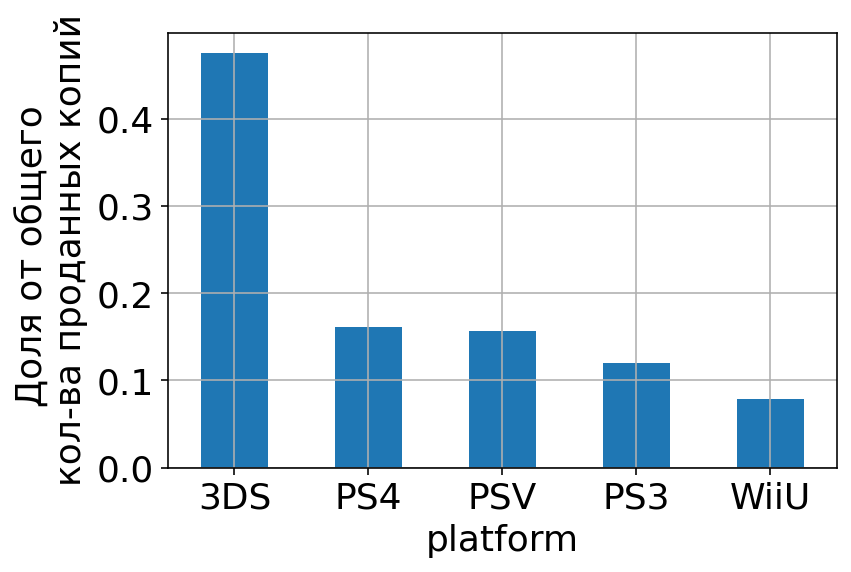

In [41]:
((actual_games.groupby('platform')['jp_sales'].agg('sum')/actual_games['jp_sales'].sum())
 .sort_values(ascending=False).head()).plot.bar(grid=True, rot=0, ylabel='Доля от общего \nкол-ва проданных копий')

Топ 5 жанров по продажам:

<AxesSubplot:xlabel='genre', ylabel='Доля от общего \nкол-ва проданных копий'>

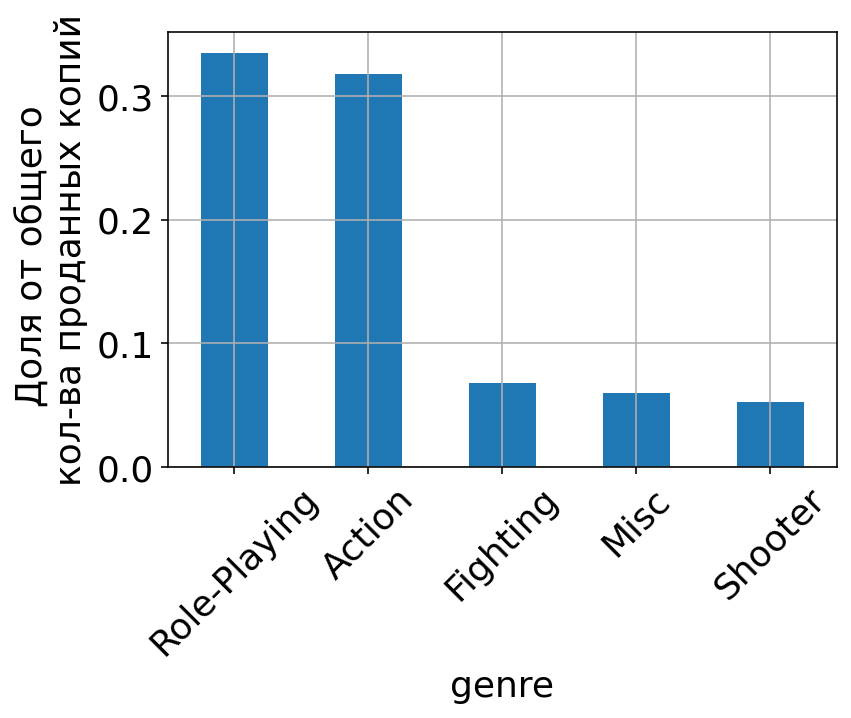

In [42]:
((actual_games.groupby('genre')['jp_sales'].agg('sum')/actual_games['jp_sales'].sum())
 .sort_values(ascending=False).head()).plot.bar(grid=True, rot=45, ylabel='Доля от общего \nкол-ва проданных копий')

Распределение рейтинга в зависимости от продаж:

<AxesSubplot:xlabel='rating', ylabel='Доля от общего \nкол-ва проданных копий'>

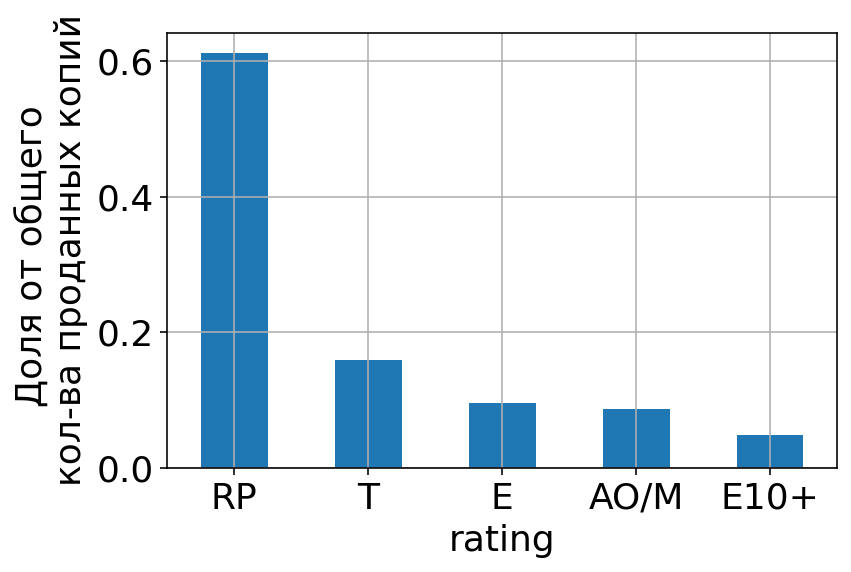

In [43]:
((actual_games.groupby('rating')['jp_sales'].agg('sum')/actual_games['jp_sales'].sum())
 .sort_values(ascending=False)).plot.bar(grid=True, rot=0, ylabel='Доля от общего \nкол-ва проданных копий')

**Вывод**:
- *Платформы*: самая популярная платформа - 3DS, последняя в пятёрке - WiiU, представлены портативные устройства и игровые консоли.
- *Жанры*: среди популярных следует выделить Ролевые и Экшен игры, каждая из них составляет больше 30 % от общей доли, в нижних строка топа находятся Action, Fighting, Misc с долей не больше 7 %;
- *Рейтинг*: RP, T, E, AO/M, E10+. Игры без рейтинга составляют аж 61 % от обще доли продаж этого региона(большое разнообразие + наибольшая суммарная прибыль среди остальных рейтингов). Из такого распределения несколько сложно предположить возраст типичного игрока, наиболее вероятно, что самый частый геймер это подросток.

# **Статистический анализ данных**

Зададим критерий значимости в alpha = 5 %.

In [44]:
alpha = .05

Поскольку мы сравниваем средние значения из 2-х генеральных совокупностей, то будем использовать ttest_ind, причём, поскольку выборки в обоих рассматриваемых случаях выборки имеют разный размер, то параметр **equal_var** зададим как **False**. В обоих случаях проводим двусторонний тест.

## Проверка первой гипотезы

Сформулируем нулевую и альтернативную гипотезу:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [45]:
xone_score = actual_games.loc[actual_games.platform == 'XOne', 'user_score']
pc_score = actual_games.loc[actual_games.platform == 'PC', 'user_score']
results = st.ttest_ind(pc_score, xone_score, equal_var=False, nan_policy='omit')
results

Ttest_indResult(statistic=-1.5777606474474923, pvalue=0.11601398086668943)

In [46]:
print('p-значение: ', results.pvalue)
print('Среднее рейтинг пользователей XOne: ', xone_score.mean())
print('Среднее рейтинг пользователей PC: ', pc_score.mean())
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.11601398086668943
Среднее рейтинг пользователей XOne:  6.594545454545454
Среднее рейтинг пользователей PC:  6.298360655737704
Не получилось отвергнуть нулевую гипотезу


## Проверка второй гипотезы

Сформулируем нулевую и альтернативную гипотезу:

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;

H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [47]:
action_score = actual_games.loc[actual_games.genre == 'Action', 'user_score']
sports_score = actual_games.loc[actual_games.genre == 'Sports', 'user_score']
results = st.ttest_ind(action_score, sports_score, equal_var=False, nan_policy='omit')
results

Ttest_indResult(statistic=8.384614718486116, pvalue=1.182555038264477e-14)

In [48]:
print('p-значение: ', results.pvalue)
print('Среднее рейтинг игр жанра Action: ', action_score.mean())
print('Среднее рейтинг игр жанра Sports: ', sports_score.mean())
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.182555038264477e-14
Среднее рейтинг игр жанра Action:  6.760606060606061
Среднее рейтинг игр жанра Sports:  5.225196850393701
Отвергаем нулевую гипотезу


**Выводы**:

Согласно полученным результатам:
- В первом случае отклонить нулевую гипотезу не удалось и учитывая, что значение pvalue крайне высокое и средние значения выборок различаются незначительно, то есть основания полагать, что H0 действительно верна.
- Во втором случае вероятность безошибочности нулевой гипотезы ничтожно мала, поэтому выбор делается в пользу альтернативной гипотезы H1. Средние значения для разных жарнов действительно отличаются.

# **Общие выводы**
Изучены данные из открытых источников об играх и их продажах в различных регионах, обработаны данные: названия колонок приведены к нижнему регистру, исключены пропуски столбца **'name'**, обработаны некорректные значения в столбцах **'user_score'**, в необходимых местах изменён тип данных на целочисленный, обработаны дубликаты и добавлен столбец **'total_sales'** с продажами по всем регионам в млн. копий. По результатам анализа представленных данных можно заключить следующее:

- Начиная с 1994 года производство игр стремительно набирает обороты по 2009 год, затем начинает постепенно уменьшаться. Игровой "бум" пришёлся на 2002, 2008 и 2009 года. 
- В среднем жизненный цикл любой платформы составляет примерно 10-12 лет, половину из которых её продажи летят вверх, а на другую половину приходится угасание.
- Оптимальным по времени сроком для рассматриваемых данных можно считать 2-3 года, поскольку это время достаточно чтобы определить текущие тренды игровой индустрии и отсеять платформы и тенденции, утрачивающие свою популярность. 
- Потенциально наиболее прибыльные платформы - PS3, X360, PS4, 3DS, XOne; каждая из них обладает рядом игр, приносящим им выгоду, превышающую значения, укладывающиеся в статистические диапазоны.
- На суммарные продажи игр для игровых станций влияет мнение критиков, а для портативных платформ(3DS) дополнительный вклад вносит и мнение игроков.
- Топ самых популярных жанров:
 - Стабильность продаж: Shooter, Sports, Platform, Fighting, Role-Playing;
 - По количеству выпускаемых игр: Action, Role-Playing, Adventure, Sports, Shooter.
- Портрет среднестатистического пользователя по регионам:
 - *NA*: гораздо чаще использует игровые станции, чем портативные платформы; больше любит активные игры(Action, Shooter), чем спокойные; любит неоднозначные игры и содержащие Mature content, в игры для всех возрастов играет неохотно.
 - *EU*: может играть с любых устройств, любит Action, Shooter, Sport игры, поэтому чаще всего рейтинг этих игр - M, RP или E.
 - *JP*: этот пользователь зачастую играет с портативных устройств (+ любит Play Station в различных вариациях), в Role-Playing и Action игры с неопределённым рейтингом RP или в более 'мягкие' игры с рейтингом E и T. Этот регион значительно отличается от остальных, и похоже, имеет свои критерии оценки игр и рейтинговую систему, которая в рамках проекта не рассматривается.
- По результатам статистических тестов не удалось отвергнуть гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и, что средние пользовательские рейтинги жанров Action и Sports различаются.

В общем стоит отметить, что несмотря на наличие пропусков, полнота данных достаточна для их анализа и статистической проверки различных гипотез. Весомую роль в пропусках сыграла сложность оценки той или иной игры с максимальной непредвзятостью и наименьшей субъективностью.